The regression results tend to generate residuals that are correlated with the dependent variable. This indicates that the regression is missing an explanatory variable that better captures the magnitude of changes in RGDP. Find a variable that improves prediction of RGDP per capita. Rerun all results presented in the panel regression section with this variable included

In [1]:
import pandas as pd  
import numpy as np  
import datetime  
  
# import data  
data = pd.read_csv("fraserDataWithRGDPPC.csv", index_col = ["ISO_Code", "Year"],   
                   parse_dates = True)  
data["RGDP Per Capita Lag"] = data.groupby(level="ISO_Code")\
    ["RGDP Per Capita"].shift(-1)

In [2]:
data.index.get_level_values("Year") >= datetime.datetime(1999, 1, 1)

array([ True,  True,  True, ..., False, False, False])

In [3]:
data = data[data.index.get_level_values("Year") > datetime.datetime(1999,1,1)]

In [4]:
data

EFW  Size of Government  \
ISO_Code Year                                       
ALB      2017-01-01  7.673511            7.528167   
         2016-01-01  7.637742            7.875862   
         2015-01-01  7.639666            7.904257   
         2014-01-01  7.586769            7.882037   
         2013-01-01  7.389525            7.807904   
...                       ...                 ...   
ZWE      2004-01-01  3.181057            5.184469   
         2003-01-01  3.675260            5.709175   
         2002-01-01  3.625483            5.514469   
         2001-01-01  3.633489            5.547411   
         2000-01-01  4.299839            5.365058   

                     Legal System & Property Rights  Sound Money  \
ISO_Code Year                                                      
ALB      2017-01-01                        5.064907     9.648271   
         2016-01-01                        5.071814     9.553657   
         2015-01-01                        5.003489     9.585625   
         2014-01-01                        4.666740     9.629320   
         2013-01-01                        4.543782     9.690942   
...                                             ...          ...   
ZWE      2004-01-01                        3.595709     0.000000   
         2003-01-01                        3.421352     1.250000   
         2002-01-01                        3.405224     1.250000   
         2001-01-01                        3.311100     1.702366   
         2000-01-01                        4.662445     2.891166   

                     Freedom to trade internationally  Regulation  \
ISO_Code Year                                                       
ALB      2017-01-01                          8.343863    7.782349   
         2016-01-01                          8.214900    7.472476   
         2015-01-01                          8.109118    7.595838   
         2014-01-01                          8.208630    7.547119   
         2013-01-01                          7.705771    7.199224   
...                                               ...         ...   
ZWE      2004-01-01                          2.567670    4.557437   
         2003-01-01                          3.120167    4.875605   
         2002-01-01                          3.002611    4.955112   
         2001-01-01                          3.184783    4.421784   
         2000-01-01                          3.224735    5.355792   

                     RGDP Per Capita  RGDP Per Capita Lag  
ISO_Code Year                                              
ALB      2017-01-01              NaN              10342.0  
         2016-01-01          10342.0              10032.0  
         2015-01-01          10032.0               9808.0  
         2014-01-01           9808.0               9660.0  
         2013-01-01           9660.0               9592.0  
...                              ...                  ...  
ZWE      2004-01-01           1622.0               1722.0  
         2003-01-01           1722.0               2054.0  
         2002-01-01           2054.0               2228.0  
         2001-01-01           2228.0               2249.0  
         2000-01-01           2249.0               2156.0  

[2589 rows x 8 columns]

In [5]:
for key in data:
    if "GDP" in key:
        data["Log " + key] = np.log(data[key])

In [6]:
diff_index = data.groupby(level=0).diff(-1).dropna().index  
data_dict = {}  
data_dict["Data"] = data  
data_dict["Diff Data"] = data.copy().loc[diff_index]  
data_dict["Diff Data"] = data.groupby(level=0).diff(-1)  
data_dict["Diff Data"]["North America"] = 1
data_dict["Diff Data"] = data_dict["Diff Data"].dropna()

In [7]:
data_dict["Data"]

EFW  Size of Government  \
ISO_Code Year                                       
ALB      2017-01-01  7.673511            7.528167   
         2016-01-01  7.637742            7.875862   
         2015-01-01  7.639666            7.904257   
         2014-01-01  7.586769            7.882037   
         2013-01-01  7.389525            7.807904   
...                       ...                 ...   
ZWE      2004-01-01  3.181057            5.184469   
         2003-01-01  3.675260            5.709175   
         2002-01-01  3.625483            5.514469   
         2001-01-01  3.633489            5.547411   
         2000-01-01  4.299839            5.365058   

                     Legal System & Property Rights  Sound Money  \
ISO_Code Year                                                      
ALB      2017-01-01                        5.064907     9.648271   
         2016-01-01                        5.071814     9.553657   
         2015-01-01                        5.003489     9.585625   
         2014-01-01                        4.666740     9.629320   
         2013-01-01                        4.543782     9.690942   
...                                             ...          ...   
ZWE      2004-01-01                        3.595709     0.000000   
         2003-01-01                        3.421352     1.250000   
         2002-01-01                        3.405224     1.250000   
         2001-01-01                        3.311100     1.702366   
         2000-01-01                        4.662445     2.891166   

                     Freedom to trade internationally  Regulation  \
ISO_Code Year                                                       
ALB      2017-01-01                          8.343863    7.782349   
         2016-01-01                          8.214900    7.472476   
         2015-01-01                          8.109118    7.595838   
         2014-01-01                          8.208630    7.547119   
         2013-01-01                          7.705771    7.199224   
...                                               ...         ...   
ZWE      2004-01-01                          2.567670    4.557437   
         2003-01-01                          3.120167    4.875605   
         2002-01-01                          3.002611    4.955112   
         2001-01-01                          3.184783    4.421784   
         2000-01-01                          3.224735    5.355792   

                     RGDP Per Capita  RGDP Per Capita Lag  \
ISO_Code Year                                               
ALB      2017-01-01              NaN              10342.0   
         2016-01-01          10342.0              10032.0   
         2015-01-01          10032.0               9808.0   
         2014-01-01           9808.0               9660.0   
         2013-01-01           9660.0               9592.0   
...                              ...                  ...   
ZWE      2004-01-01           1622.0               1722.0   
         2003-01-01           1722.0               2054.0   
         2002-01-01           2054.0               2228.0   
         2001-01-01           2228.0               2249.0   
         2000-01-01           2249.0               2156.0   

                     Log RGDP Per Capita  Log RGDP Per Capita Lag  
ISO_Code Year                                                      
ALB      2017-01-01                  NaN                 9.243969  
         2016-01-01             9.243969                 9.213535  
         2015-01-01             9.213535                 9.190954  
         2014-01-01             9.190954                 9.175749  
         2013-01-01             9.175749                 9.168685  
...                                  ...                      ...  
ZWE      2004-01-01             7.391415                 7.451242  
         2003-01-01             7.451242                 7.627544  
         2002-01-01             7.627544                 7.708860  
         20

In [8]:
import pandas as pd  
import numpy as np  
import datetime  
  
def create_indicator_variable(data, indicator_name, index_name,   
                              target_index_list):  
    # Prepare column with name of indicator variable  
    data[indicator_name] = 0  
    # for each index whose name matches an entry in target_index_list  
    # a value of 1 will be recorded  
    for index in target_index_list:  
        data.loc[data.index.get_level_values(\
            index_name) == index, [indicator_name]] = 1  
        
# import data  
data = pd.read_csv("fraserDataWithRGDPPC.csv", index_col = ["ISO_Code", "Year"],   
                   parse_dates = True) 
 
data = data[data.index.get_level_values("Year") > datetime.datetime(2000,1,1)]  
keys = data.keys()
for key in keys:  
    if "GDP" in key:  
        data[key + " Lag"] = data[key].groupby("ISO_Code").shift()
        data["Log " + key] = np.log(data[key])  
        data["Log " + key + " Lag"] = data["Log " + key].groupby("ISO_Code").shift()
        
        
# so initialize the diff data as teh dataframe but only include index values  
# from a differenced matrix (one year of observations will be missing)  
diff_index = data.groupby(level=0).diff().dropna().index  
data_dict = {}  
data_dict["Data"] = data  

data_dict["Diff Data"] = data.copy().loc[diff_index]  
data_dict["Diff Data"] = data.groupby("ISO_Code").diff() 
data_dict["Diff Data"].dropna(inplace = True)  
  
# Create indicator variable for North Amierca in both data and diff_data  
indicator_name = "North America"  
index_name = "ISO_Code"  
countries_in_north_america = ["BHS", "BRB", "BLZ", "CAN", "CRI", "DOM", "SLV",  
                              "GTM", "HTI", "HND", "JAM", "MEX", "NIC", "PAN",  
                              "TTO", "USA"]  
for key in data_dict:  
    data = data_dict[key]  
    create_indicator_variable(data = data, indicator_name = indicator_name,  
        index_name = index_name,target_index_list = countries_in_north_america)  

In [9]:
data_dict[key]

EFW  Size of Government  \
ISO_Code Year                                       
ALB      2014-01-01 -0.052896           -0.022220   
         2013-01-01 -0.197245           -0.074133   
         2012-01-01 -0.057193            0.288471   
         2011-01-01  0.048732           -0.275409   
         2010-01-01 -0.000338            0.018699   
...                       ...                 ...   
ZWE      2005-01-01 -0.123308           -0.479647   
         2004-01-01  0.291817            0.893369   
         2003-01-01  0.494203            0.524706   
         2002-01-01 -0.049776           -0.194706   
         2001-01-01  0.008006            0.032941   

                     Legal System & Property Rights  Sound Money  \
ISO_Code Year                                                      
ALB      2014-01-01                       -0.336748     0.043694   
         2013-01-01                       -0.122958     0.061623   
         2012-01-01                       -0.072290     0.019798   
         2011-01-01                        0.403390     0.064519   
         2010-01-01                        0.380981    -0.050237   
...                                             ...          ...   
ZWE      2005-01-01                       -0.085038     0.000000   
         2004-01-01                        0.108099     0.000000   
         2003-01-01                       -0.174357     1.250000   
         2002-01-01                       -0.016127     0.000000   
         2001-01-01                       -0.094124     0.452366   

                     Freedom to trade internationally  Regulation  \
ISO_Code Year                                                       
ALB      2014-01-01                          0.099512   -0.048719   
         2013-01-01                         -0.502859   -0.347895   
         2012-01-01                         -0.590349    0.068405   
         2011-01-01                          0.003521    0.047639   
         2010-01-01                          0.127981   -0.479114   
...                                               ...         ...   
ZWE      2005-01-01                          0.069345   -0.121200   
         2004-01-01                          0.199055    0.258565   
         2003-01-01                          0.552497    0.318168   
         2002-01-01                         -0.117556    0.079507   
         2001-01-01                          0.182173   -0.533328   

                     RGDP Per Capita  RGDP Per Capita Lag  \
ISO_Code Year                                               
ALB      2014-01-01           -224.0               -310.0   
         2013-01-01           -148.0               -224.0   
         2012-01-01            -68.0               -148.0   
         2011-01-01           -108.0                -68.0   
         2010-01-01           -212.0               -108.0   
...                              ...                  ...   
ZWE      2005-01-01             43.0                 36.0   
         2004-01-01            112.0                 43.0   
         2003-01-01            100.0                112.0   
         2002-01-01            332.0                100.0   
         2001-01-01            174.0                332.0   

                     Log RGDP Per Capita  Log RGDP Per Capita Lag  \
ISO_Code Year                                                       
ALB      2014-01-01            -0.022582                -0.030433   
         2013-01-01            -0.015205                -0.022582   
         2012-01-01            -0.007064                -0.015205   
         2011-01-01            -0.011323                -0.007064   
         2010-01-01            -0.022607                -0.011323   
...                                  ...                      ...   
ZWE      2005-01-01             0.028890                 0.024846   
         2004-01-01             0.071550                 0.028890   
         2003-01-01             0.059826                 0.071550   


In [10]:
data_dict[key].dropna()

EFW  Size of Government  \
ISO_Code Year                                       
ALB      2014-01-01 -0.052896           -0.022220   
         2013-01-01 -0.197245           -0.074133   
         2012-01-01 -0.057193            0.288471   
         2011-01-01  0.048732           -0.275409   
         2010-01-01 -0.000338            0.018699   
...                       ...                 ...   
ZWE      2005-01-01 -0.123308           -0.479647   
         2004-01-01  0.291817            0.893369   
         2003-01-01  0.494203            0.524706   
         2002-01-01 -0.049776           -0.194706   
         2001-01-01  0.008006            0.032941   

                     Legal System & Property Rights  Sound Money  \
ISO_Code Year                                                      
ALB      2014-01-01                       -0.336748     0.043694   
         2013-01-01                       -0.122958     0.061623   
         2012-01-01                       -0.072290     0.019798   
         2011-01-01                        0.403390     0.064519   
         2010-01-01                        0.380981    -0.050237   
...                                             ...          ...   
ZWE      2005-01-01                       -0.085038     0.000000   
         2004-01-01                        0.108099     0.000000   
         2003-01-01                       -0.174357     1.250000   
         2002-01-01                       -0.016127     0.000000   
         2001-01-01                       -0.094124     0.452366   

                     Freedom to trade internationally  Regulation  \
ISO_Code Year                                                       
ALB      2014-01-01                          0.099512   -0.048719   
         2013-01-01                         -0.502859   -0.347895   
         2012-01-01                         -0.590349    0.068405   
         2011-01-01                          0.003521    0.047639   
         2010-01-01                          0.127981   -0.479114   
...                                               ...         ...   
ZWE      2005-01-01                          0.069345   -0.121200   
         2004-01-01                          0.199055    0.258565   
         2003-01-01                          0.552497    0.318168   
         2002-01-01                         -0.117556    0.079507   
         2001-01-01                          0.182173   -0.533328   

                     RGDP Per Capita  RGDP Per Capita Lag  \
ISO_Code Year                                               
ALB      2014-01-01           -224.0               -310.0   
         2013-01-01           -148.0               -224.0   
         2012-01-01            -68.0               -148.0   
         2011-01-01           -108.0                -68.0   
         2010-01-01           -212.0               -108.0   
...                              ...                  ...   
ZWE      2005-01-01             43.0                 36.0   
         2004-01-01            112.0                 43.0   
         2003-01-01            100.0                112.0   
         2002-01-01            332.0                100.0   
         2001-01-01            174.0                332.0   

                     Log RGDP Per Capita  Log RGDP Per Capita Lag  \
ISO_Code Year                                                       
ALB      2014-01-01            -0.022582                -0.030433   
         2013-01-01            -0.015205                -0.022582   
         2012-01-01            -0.007064                -0.015205   
         2011-01-01            -0.011323                -0.007064   
         2010-01-01            -0.022607                -0.011323   
...                                  ...                      ...   
ZWE      2005-01-01             0.028890                 0.024846   
         2004-01-01             0.071550                 0.028890   
         2003-01-01             0.059826                 0.071550   


## Initial Regressioin

In [11]:
import statsmodels.api as sm
# . . . 
# prepare regression variables  
X_names = ["EFW", "Log RGDP Per Capita Lag"]  
y_name = ["Log RGDP Per Capita"]  

# save instance of regression class  
for key in data_dict:  
    reg_data = data_dict[key].dropna()
    X = reg_data[X_names]
    X["Constant"] = 1
    Y = reg_data[y_name]    # call OLS method  
    print(key)
    data = data_dict[key]  
    results = sm.OLS(Y, X).fit()  
    print(results.summary())

Data
                             OLS Regression Results                            
Dep. Variable:     Log RGDP Per Capita   R-squared:                       0.999
Model:                             OLS   Adj. R-squared:                  0.999
Method:                  Least Squares   F-statistic:                 8.073e+05
Date:                 Sun, 21 Nov 2021   Prob (F-statistic):               0.00
Time:                         17:58:23   Log-Likelihood:                 3475.9
No. Observations:                 2031   AIC:                            -6946.
Df Residuals:                     2028   BIC:                            -6929.
Df Model:                            2                                         
Covariance Type:             nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
EFW        

<ipython-input-11-0b2aaf4f0a3e>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["Constant"] = 1
<ipython-input-11-0b2aaf4f0a3e>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["Constant"] = 1


## Adding the North America Variable

In [12]:
X_names = ["EFW", "Log RGDP Per Capita Lag", "North America"]
# . . .
for key in data_dict:  
    reg_data = data_dict[key].dropna()
    X = reg_data[X_names]
    X["Constant"] = 1
    Y = reg_data[y_name]    # call OLS method  
    print(key)
    data = data_dict[key]  
    results = sm.OLS(Y, X).fit()  
    print(results.summary())

Data
                             OLS Regression Results                            
Dep. Variable:     Log RGDP Per Capita   R-squared:                       0.999
Model:                             OLS   Adj. R-squared:                  0.999
Method:                  Least Squares   F-statistic:                 5.385e+05
Date:                 Sun, 21 Nov 2021   Prob (F-statistic):               0.00
Time:                         17:58:23   Log-Likelihood:                 3477.0
No. Observations:                 2031   AIC:                            -6946.
Df Residuals:                     2027   BIC:                            -6923.
Df Model:                            3                                         
Covariance Type:             nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
EFW        

<ipython-input-12-212555334fa0>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["Constant"] = 1
<ipython-input-12-212555334fa0>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["Constant"] = 1


Data
Entity = True
Time = True
Data
                           PanelOLS Estimation Summary                           
Dep. Variable:     Log RGDP Per Capita   R-squared:                        0.0708
Estimator:                    PanelOLS   R-squared (Between):              0.1185
No. Observations:                 2031   R-squared (Within):               0.1328
Date:                 Sun, Nov 21 2021   R-squared (Overall):              0.1279
Time:                         18:18:02   Log-likelihood                    1908.3
Cov. Estimator:              Clustered                                           
                                         F-statistic:                      28.386
Entities:                          162   P-value                           0.0000
Avg Obs:                        12.537   Distribution:                  F(5,1863)
Min Obs:                        0.0000                                           
Max Obs:                        15.000   F-statistic (robust):

<ipython-input-27-b988006cbbbc>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["Constant"] = 1
<ipython-input-27-b988006cbbbc>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reg_data["Predictor"] = results.predict()
<ipython-input-27-b988006cbbbc>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.

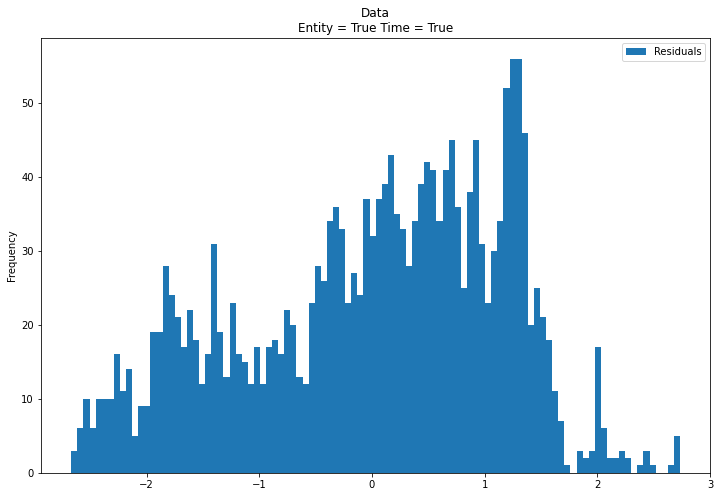

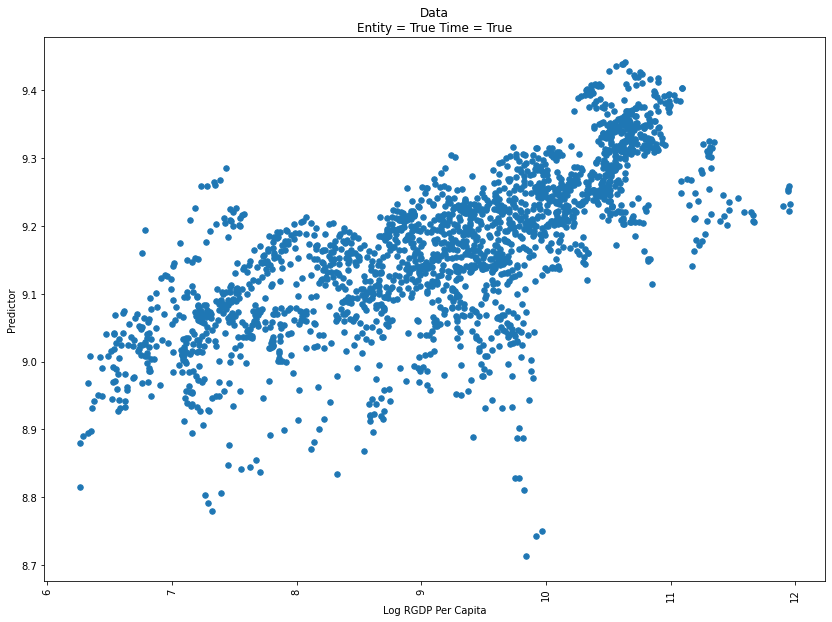

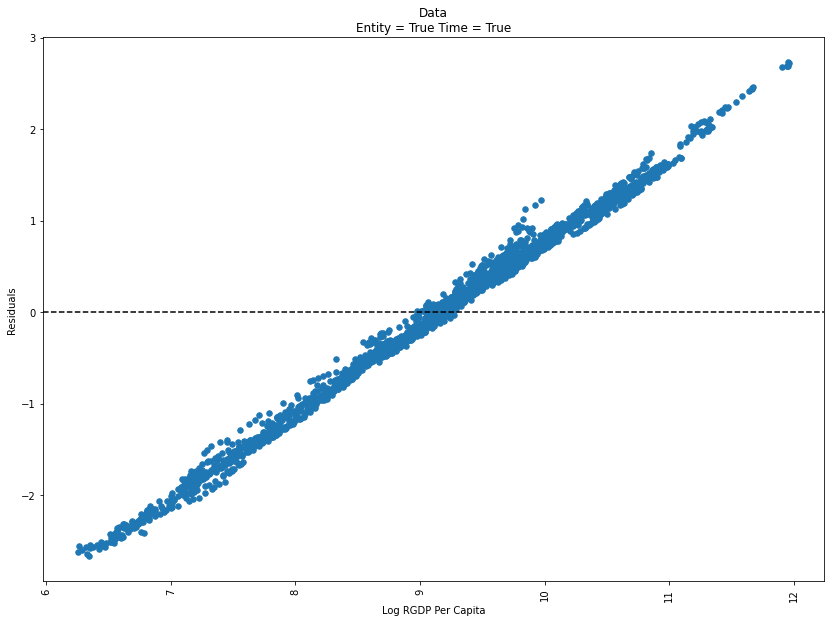

Data
Entity = True
Time = False
Data
                           PanelOLS Estimation Summary                           
Dep. Variable:     Log RGDP Per Capita   R-squared:                        0.2108
Estimator:                    PanelOLS   R-squared (Between):              0.2018
No. Observations:                 2031   R-squared (Within):               0.2108
Date:                 Sun, Nov 21 2021   R-squared (Overall):              0.2179
Time:                         18:18:03   Log-likelihood                    1397.6
Cov. Estimator:              Clustered                                           
                                         F-statistic:                      100.26
Entities:                          162   P-value                           0.0000
Avg Obs:                        12.537   Distribution:                  F(5,1877)
Min Obs:                        0.0000                                           
Max Obs:                        15.000   F-statistic (robust)

<ipython-input-27-b988006cbbbc>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["Constant"] = 1
<ipython-input-27-b988006cbbbc>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reg_data["Predictor"] = results.predict()
<ipython-input-27-b988006cbbbc>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.

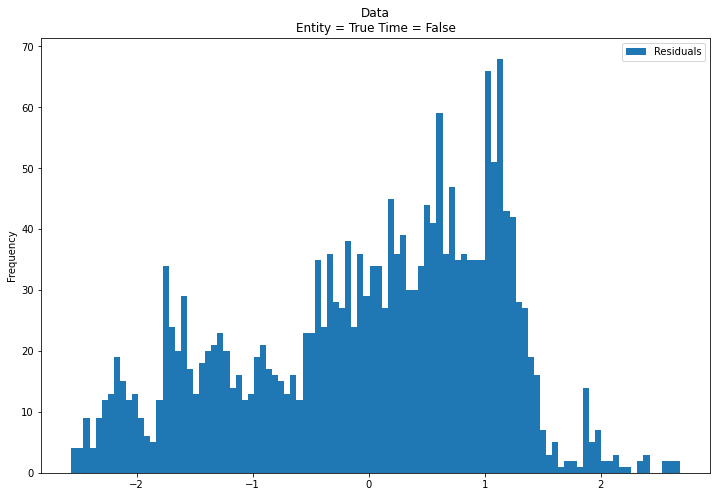

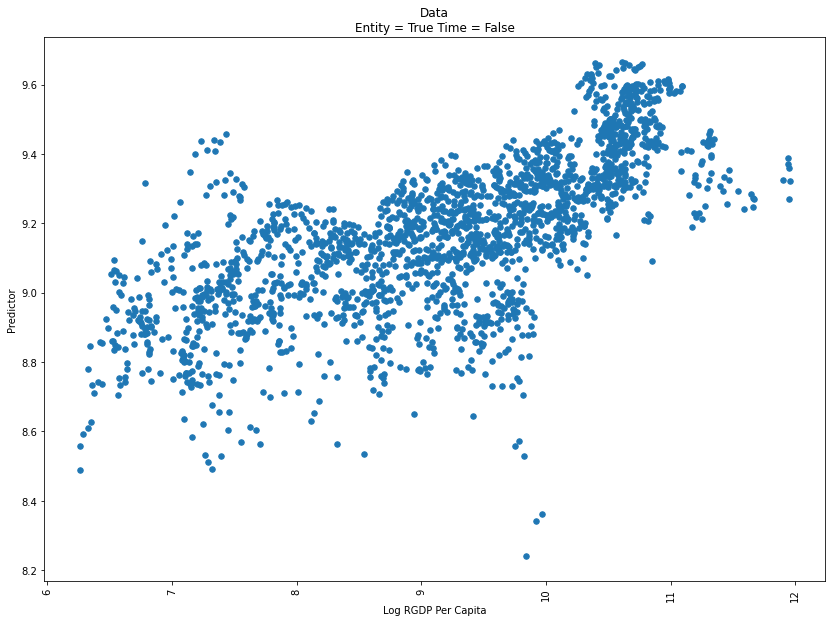

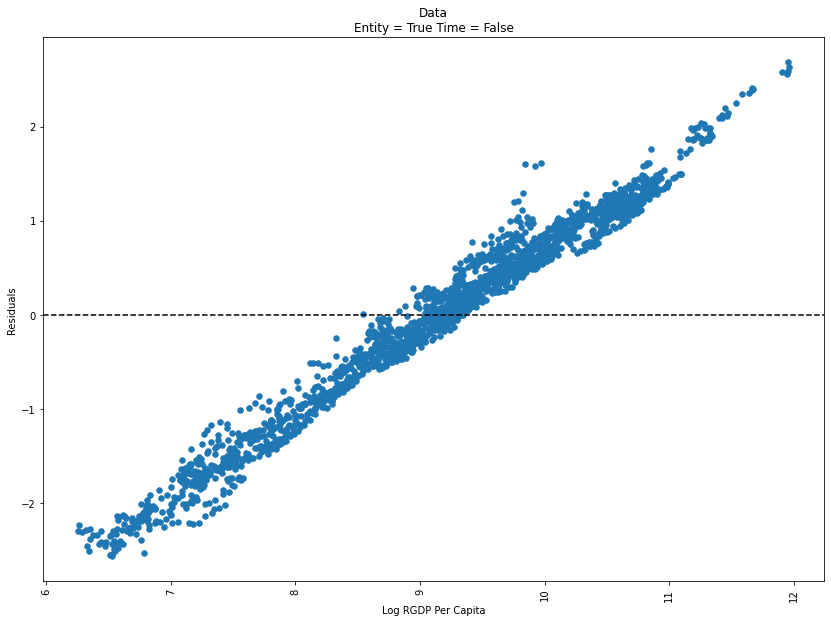

Data
Entity = False
Time = True
Data
                           PanelOLS Estimation Summary                           
Dep. Variable:     Log RGDP Per Capita   R-squared:                        0.6156
Estimator:                    PanelOLS   R-squared (Between):              0.6172
No. Observations:                 2031   R-squared (Within):              -1.5357
Date:                 Sun, Nov 21 2021   R-squared (Overall):              0.6145
Time:                         18:18:04   Log-likelihood                   -2335.4
Cov. Estimator:              Clustered                                           
                                         F-statistic:                      643.99
Entities:                          162   P-value                           0.0000
Avg Obs:                        12.537   Distribution:                  F(5,2011)
Min Obs:                        0.0000                                           
Max Obs:                        15.000   F-statistic (robust)

<ipython-input-27-b988006cbbbc>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["Constant"] = 1
<ipython-input-27-b988006cbbbc>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reg_data["Predictor"] = results.predict()
<ipython-input-27-b988006cbbbc>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.

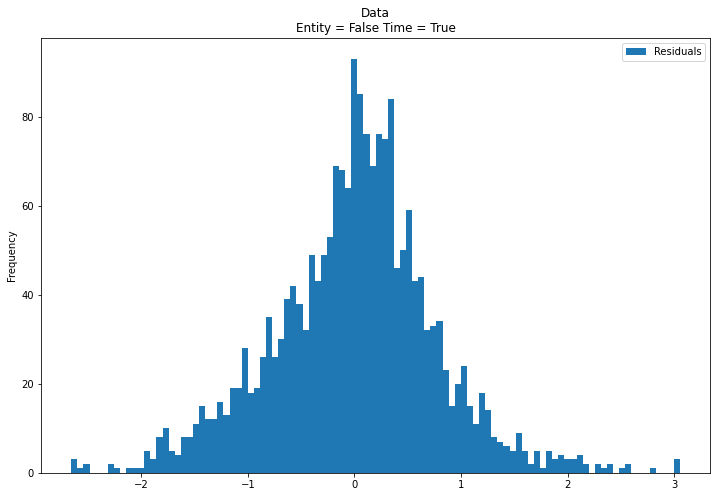

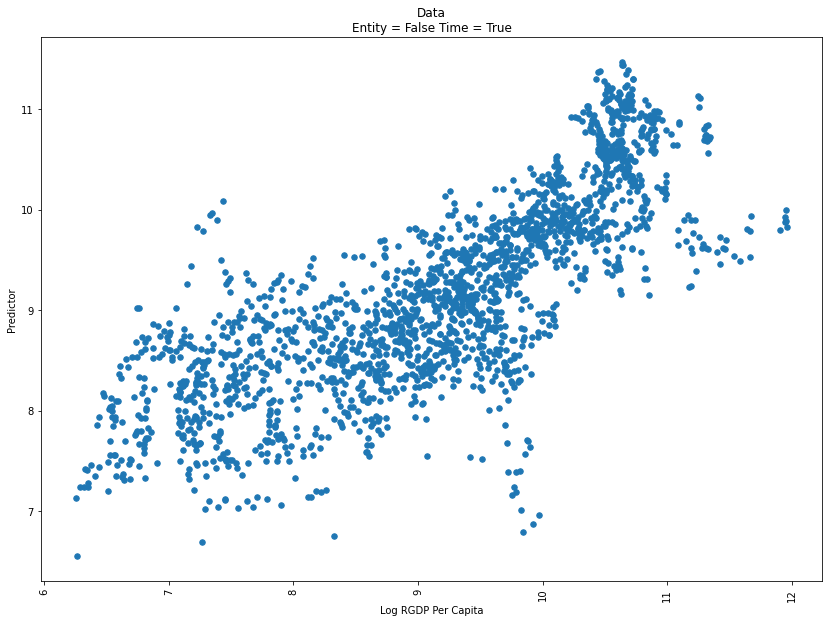

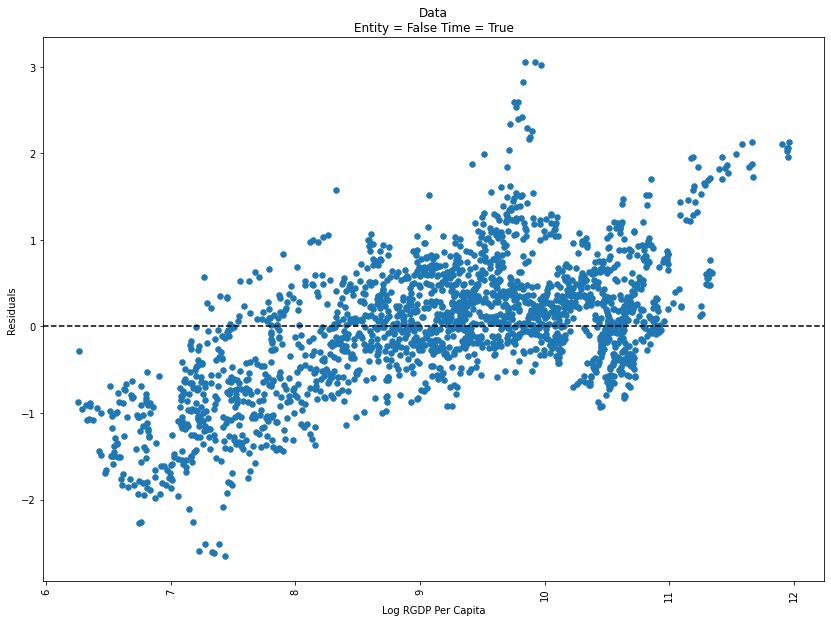

Data
Entity = False
Time = False
Data
                           PanelOLS Estimation Summary                           
Dep. Variable:     Log RGDP Per Capita   R-squared:                        0.6146
Estimator:                    PanelOLS   R-squared (Between):              0.6167
No. Observations:                 2031   R-squared (Within):              -1.4914
Date:                 Sun, Nov 21 2021   R-squared (Overall):              0.6146
Time:                         18:18:04   Log-likelihood                   -2340.5
Cov. Estimator:              Clustered                                           
                                         F-statistic:                      645.80
Entities:                          162   P-value                           0.0000
Avg Obs:                        12.537   Distribution:                  F(5,2025)
Min Obs:                        0.0000                                           
Max Obs:                        15.000   F-statistic (robust

<ipython-input-27-b988006cbbbc>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["Constant"] = 1
<ipython-input-27-b988006cbbbc>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reg_data["Predictor"] = results.predict()
<ipython-input-27-b988006cbbbc>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.

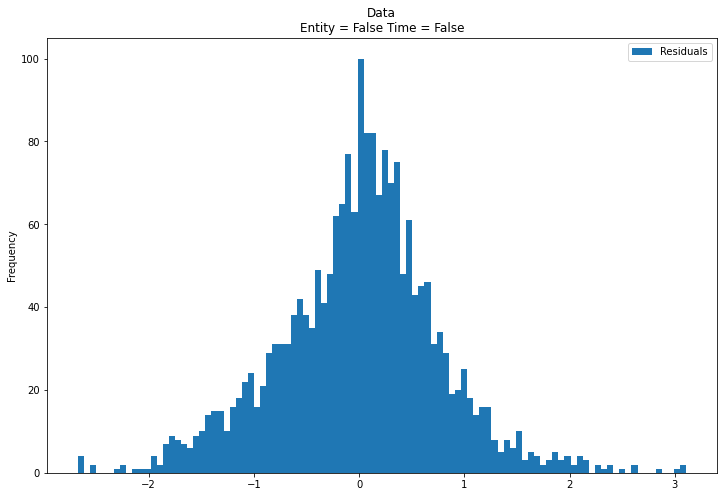

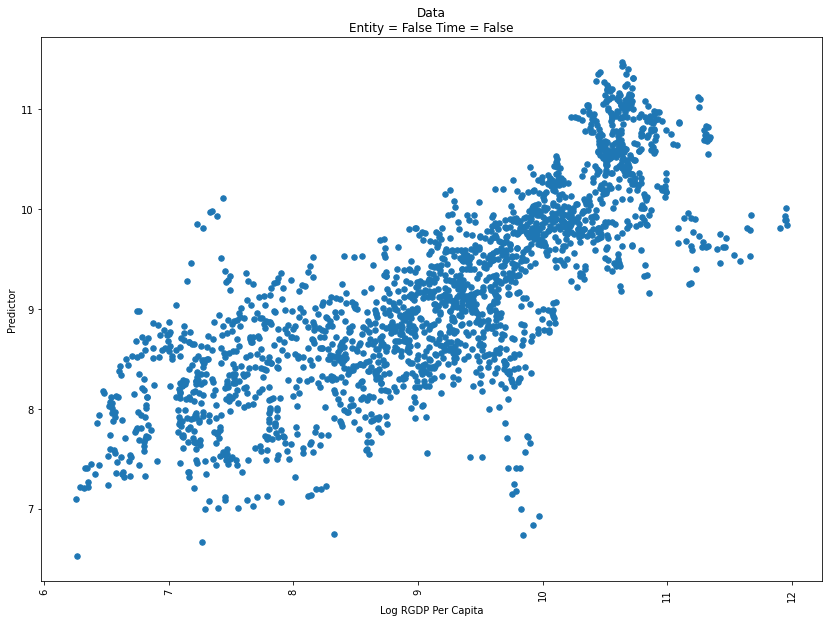

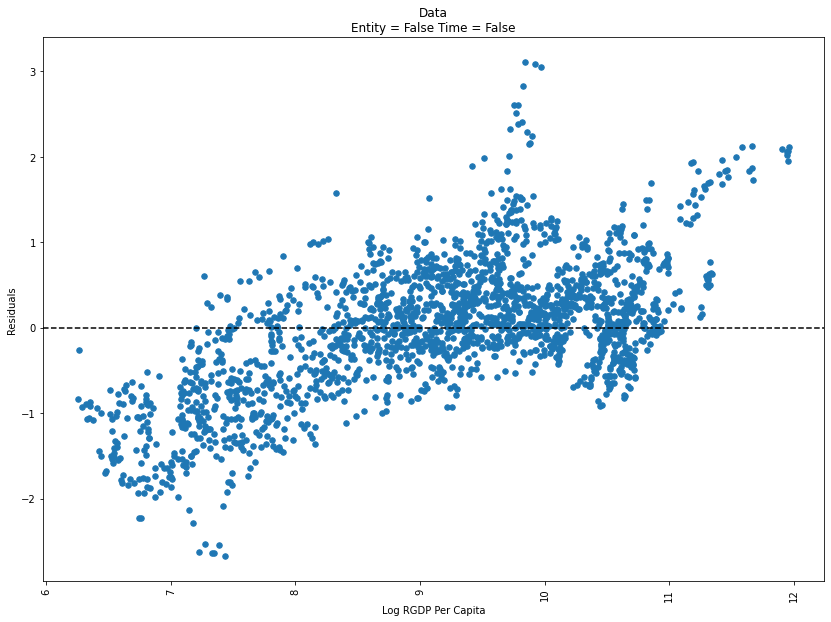

Diff Data
Entity = True
Time = True
Diff Data
                           PanelOLS Estimation Summary                           
Dep. Variable:     Log RGDP Per Capita   R-squared:                        0.0192
Estimator:                    PanelOLS   R-squared (Between):              0.0021
No. Observations:                 1882   R-squared (Within):               0.0177
Date:                 Sun, Nov 21 2021   R-squared (Overall):              0.0198
Time:                         18:18:05   Log-likelihood                    3701.2
Cov. Estimator:              Clustered                                           
                                         F-statistic:                      6.7241
Entities:                          162   P-value                           0.0000
Avg Obs:                        11.617   Distribution:                  F(5,1715)
Min Obs:                        0.0000                                           
Max Obs:                        14.000   F-statistic

<ipython-input-27-b988006cbbbc>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["Constant"] = 1


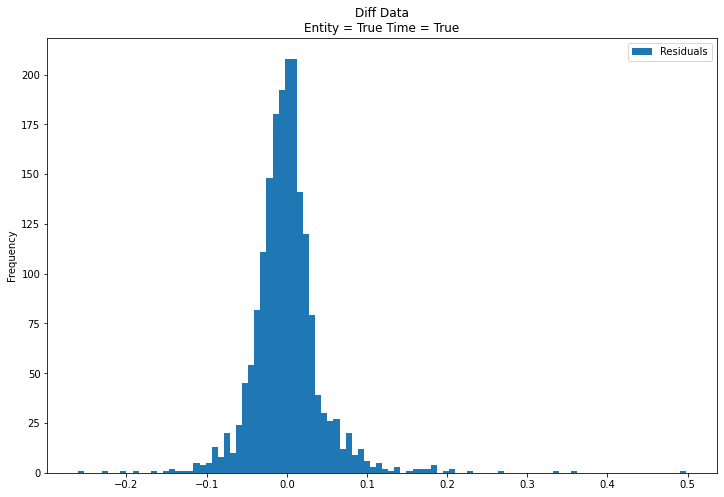

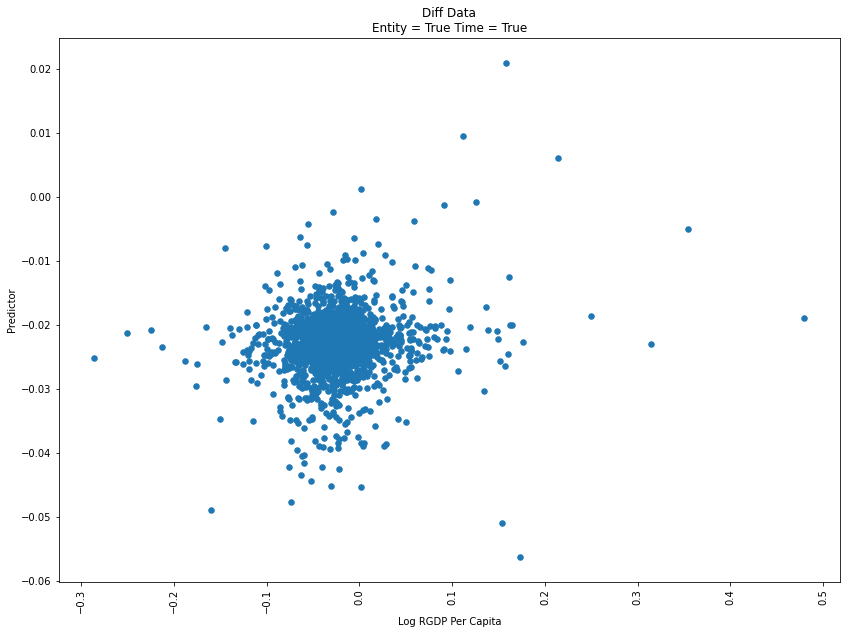

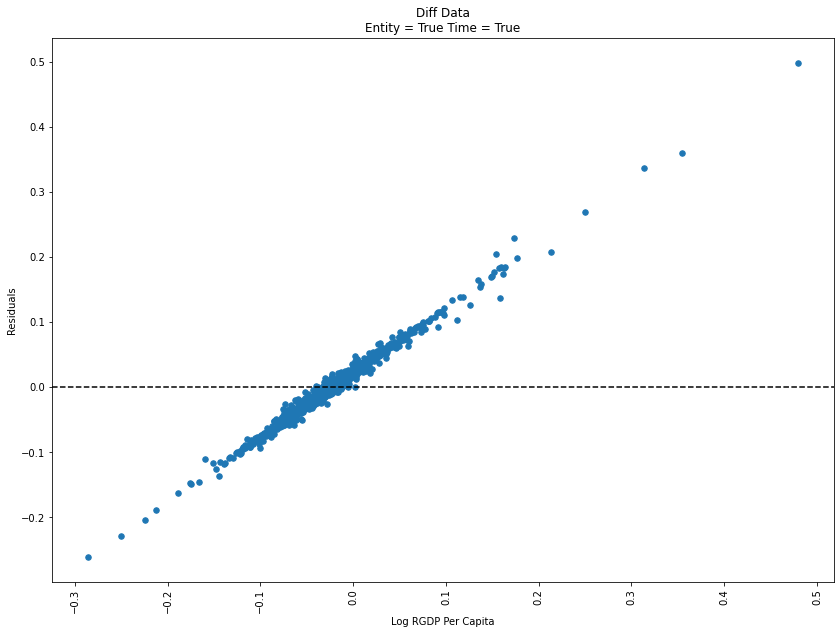

Diff Data
Entity = True
Time = False
Diff Data
                           PanelOLS Estimation Summary                           
Dep. Variable:     Log RGDP Per Capita   R-squared:                        0.0232
Estimator:                    PanelOLS   R-squared (Between):              0.0127
No. Observations:                 1882   R-squared (Within):               0.0232
Date:                 Sun, Nov 21 2021   R-squared (Overall):              0.0255
Time:                         18:18:06   Log-likelihood                    3531.4
Cov. Estimator:              Clustered                                           
                                         F-statistic:                      8.2208
Entities:                          162   P-value                           0.0000
Avg Obs:                        11.617   Distribution:                  F(5,1728)
Min Obs:                        0.0000                                           
Max Obs:                        14.000   F-statisti

<ipython-input-27-b988006cbbbc>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["Constant"] = 1


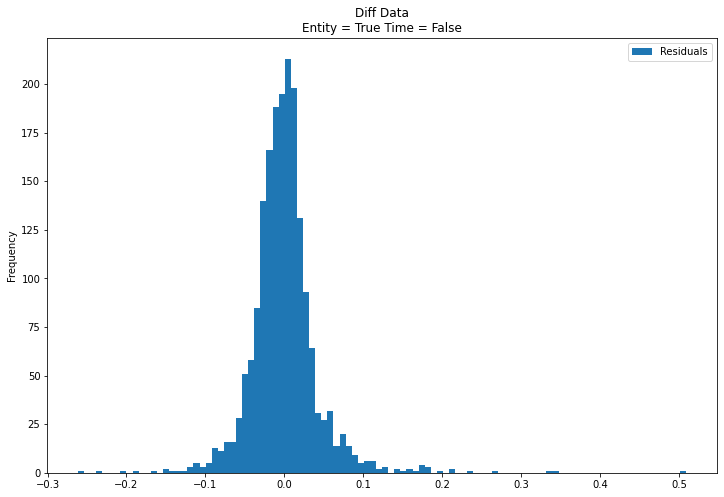

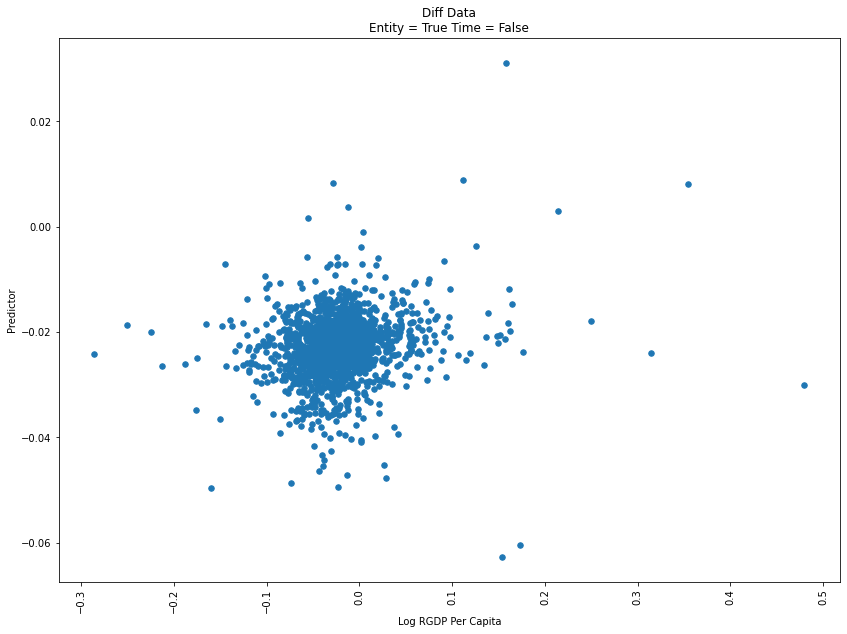

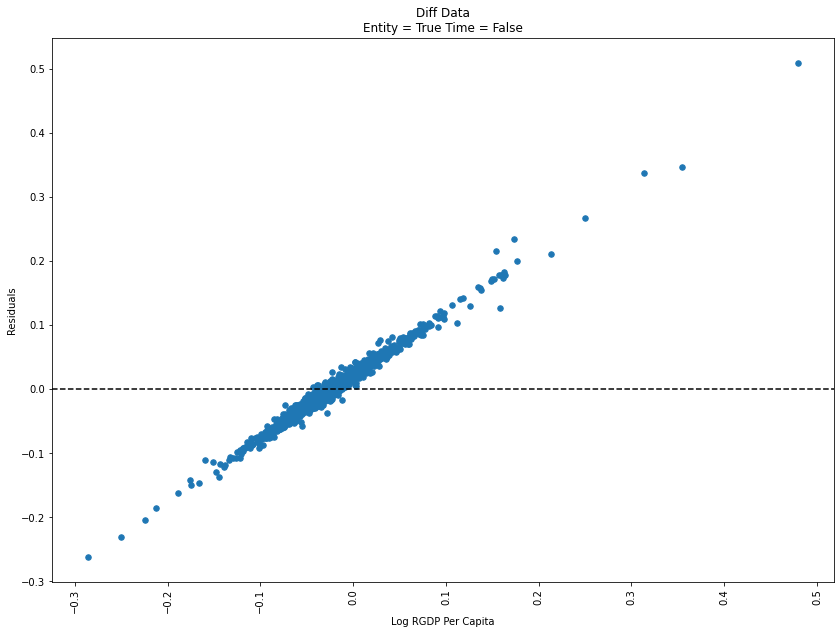

Diff Data
Entity = False
Time = True
Diff Data
                           PanelOLS Estimation Summary                           
Dep. Variable:     Log RGDP Per Capita   R-squared:                        0.0231
Estimator:                    PanelOLS   R-squared (Between):              0.0161
No. Observations:                 1882   R-squared (Within):               0.0184
Date:                 Sun, Nov 21 2021   R-squared (Overall):              0.0236
Time:                         18:18:06   Log-likelihood                    3339.5
Cov. Estimator:              Clustered                                           
                                         F-statistic:                      8.8245
Entities:                          162   P-value                           0.0000
Avg Obs:                        11.617   Distribution:                  F(5,1863)
Min Obs:                        0.0000                                           
Max Obs:                        14.000   F-statisti

<ipython-input-27-b988006cbbbc>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["Constant"] = 1


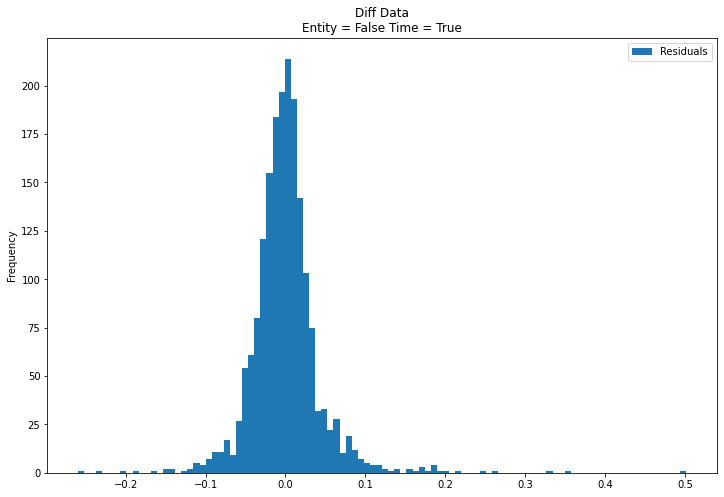

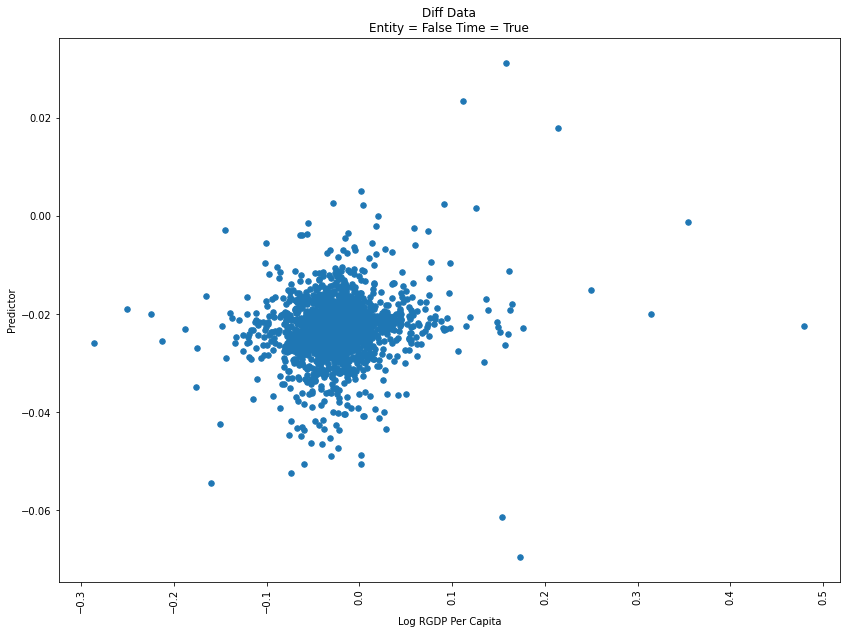

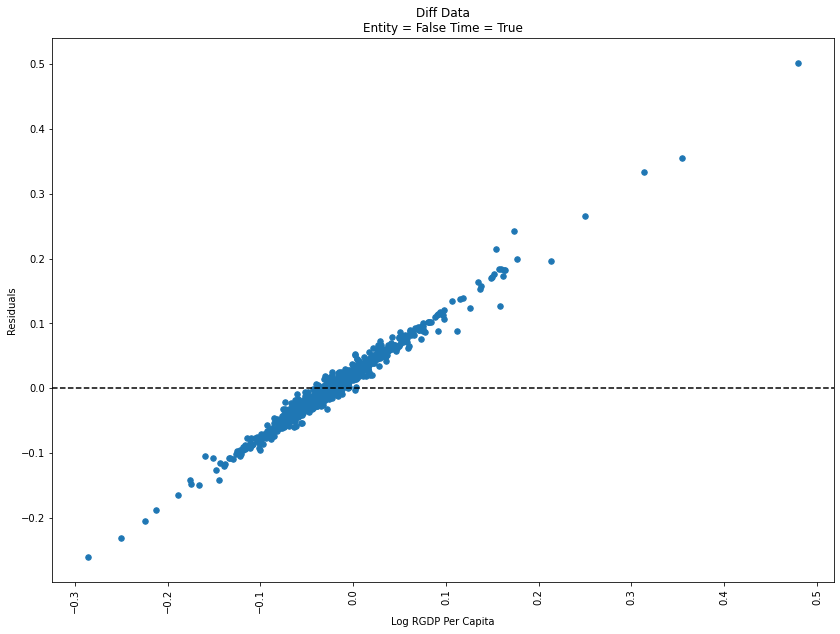

Diff Data
Entity = False
Time = False
Diff Data
                           PanelOLS Estimation Summary                           
Dep. Variable:     Log RGDP Per Capita   R-squared:                        0.0271
Estimator:                    PanelOLS   R-squared (Between):              0.0262
No. Observations:                 1882   R-squared (Within):               0.0212
Date:                 Sun, Nov 21 2021   R-squared (Overall):              0.0271
Time:                         18:18:07   Log-likelihood                    3220.9
Cov. Estimator:              Clustered                                           
                                         F-statistic:                      10.447
Entities:                          162   P-value                           0.0000
Avg Obs:                        11.617   Distribution:                  F(5,1876)
Min Obs:                        0.0000                                           
Max Obs:                        14.000   F-statist

<ipython-input-27-b988006cbbbc>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["Constant"] = 1


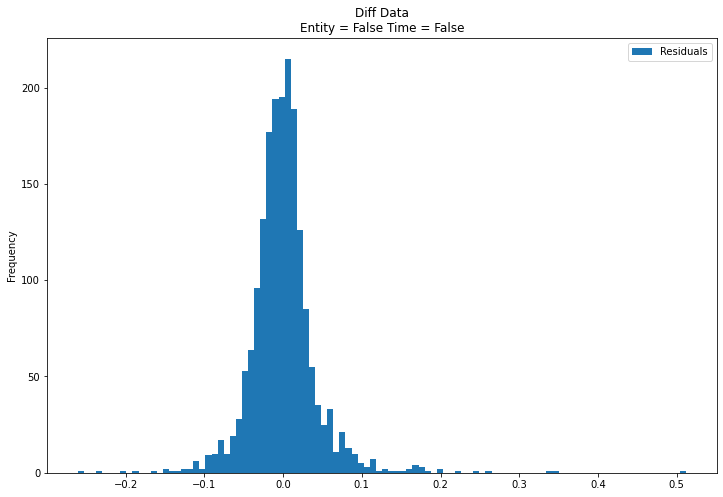

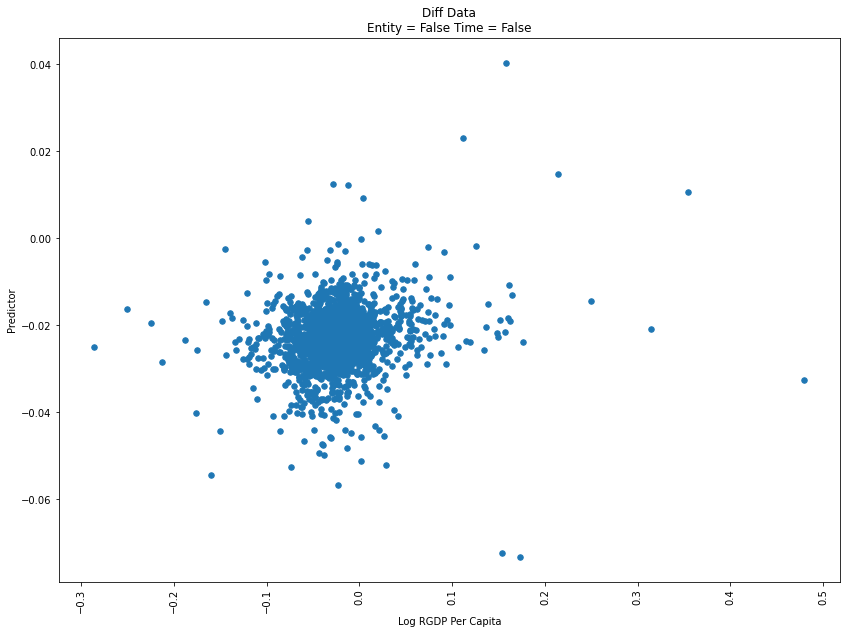

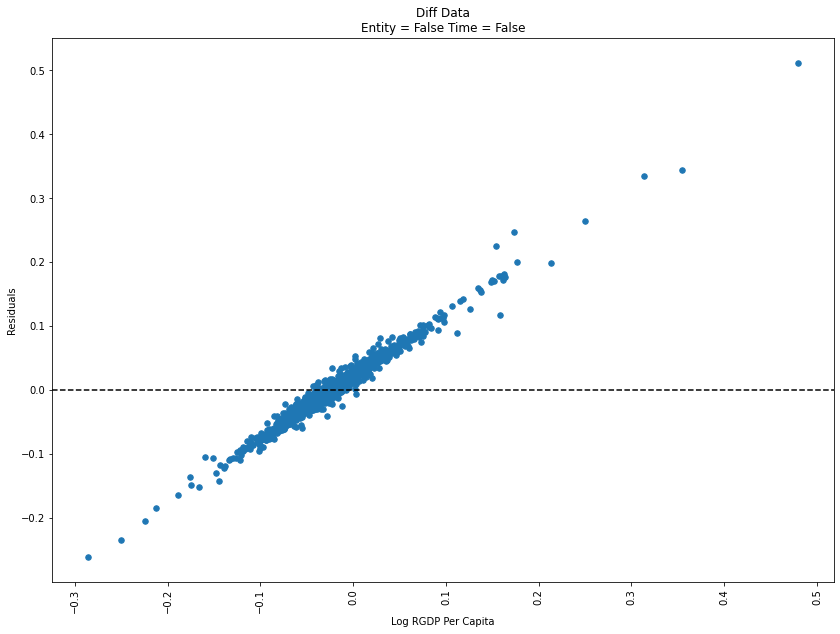

In [27]:
import matplotlib.pyplot as plt
from linearmodels import PanelOLS
# . . . .
y_name = ["Log RGDP Per Capita"]
X_names = ["Size of Government", 
          "Legal System & Property Rights", 
          "Sound Money",
          "Freedom to trade internationally",
          "Regulation"]
for key, data in data_dict.items():
    for entity in [True, False]:
        for time in [True, False]:
            print(key)
            print("Entity =", entity)
            print("Time =", time)
            reg_data = data_dict[key].dropna()
            Y = reg_data[y_name]
            X = reg_data[X_names]
            X["Constant"] = 1
            # call panel_regression method        
            model = PanelOLS(Y,X, entity_effects=entity, time_effects=time)
            results = model.fit(cov_type='clustered', cluster_entity=True)
            print(key, results, sep ="\n") 
            reg_data["Predictor"] = results.predict()
            reg_data["Residuals"] = reg_data[y_name[0]].sub(reg_data["Predictor"])

            # plot distribution of residuals
            fig, ax = plt.subplots(figsize = (12,8))
            reg_data[["Residuals"]].plot.hist(bins = 100, ax = ax)
            plt.title(key + "\nEntity = " + str(entity) + " Time = " + str(time) )

            # plot observed vs. predicted values
            fig, ax = plt.subplots(figsize = (14,10))
            reg_data.plot.scatter(x = y_name[0],
                             y = "Predictor", 
                              s = 30, ax = ax)
            plt.xticks(rotation=90)
            plt.title(key + "\nEntity = " + str(entity) + " Time = " + str(time) )
            plt.show()
            plt.close()

            # plot observed against residuals
            fig, ax = plt.subplots(figsize = (14,10))
            reg_data.plot.scatter(x = y_name[0],
                             y = "Residuals", 
                              s = 30, ax = ax)
            ax.axhline(0, ls = "--", color = "k")
            plt.xticks(rotation=90)
            plt.title(key + "\nEntity = " + str(entity) + " Time = " + str(time) )
            plt.show()
            plt.close()

# Homework

The regression results tend to generate residuals that are correlated with the dependent variable. This indicates that the regression is missing an explanatory variable that better captures the magnitude of changes in RGDP. Find a variable that improves prediction of RGDP per capita. Rerun all results presented in the panel regression section with this variable included

### First tried running the regression without a constant, meaning when every variable is equal to zero the Log RGDP is equal to zero

Data
Entity = True
Time = True
Data
                           PanelOLS Estimation Summary                           
Dep. Variable:     Log RGDP Per Capita   R-squared:                        0.0708
Estimator:                    PanelOLS   R-squared (Between):              0.1525
No. Observations:                 2031   R-squared (Within):               0.1328
Date:                 Sun, Nov 21 2021   R-squared (Overall):              0.1526
Time:                         18:18:19   Log-likelihood                    1908.3
Cov. Estimator:              Clustered                                           
                                         F-statistic:                      28.386
Entities:                          162   P-value                           0.0000
Avg Obs:                        12.537   Distribution:                  F(5,1863)
Min Obs:                        0.0000                                           
Max Obs:                        15.000   F-statistic (robust):

<ipython-input-28-1245126e54c2>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reg_data["Predictor"] = results.predict()
<ipython-input-28-1245126e54c2>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reg_data["Residuals"] = reg_data[y_name[0]].sub(reg_data["Predictor"])


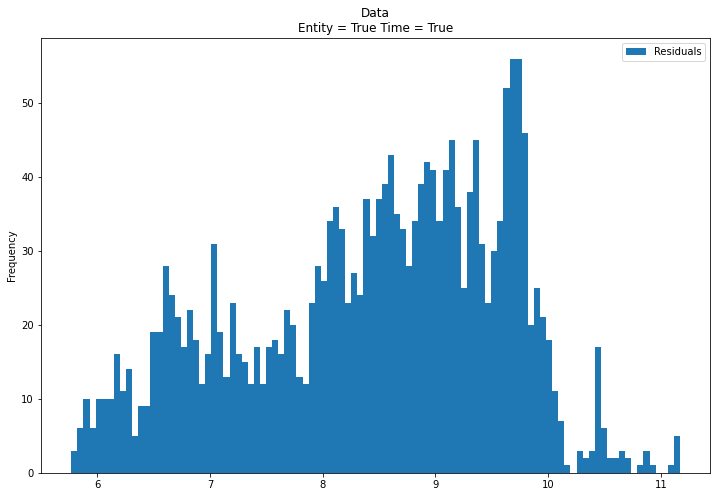

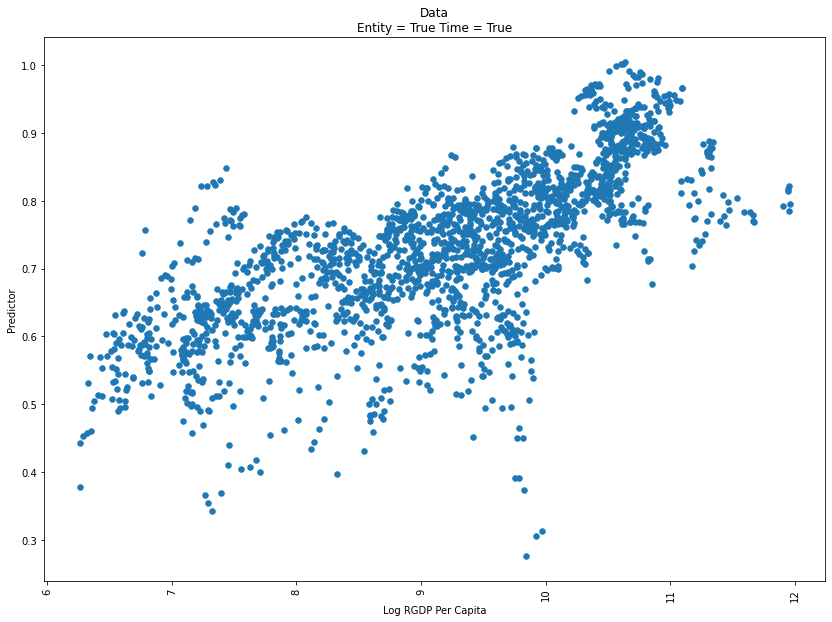

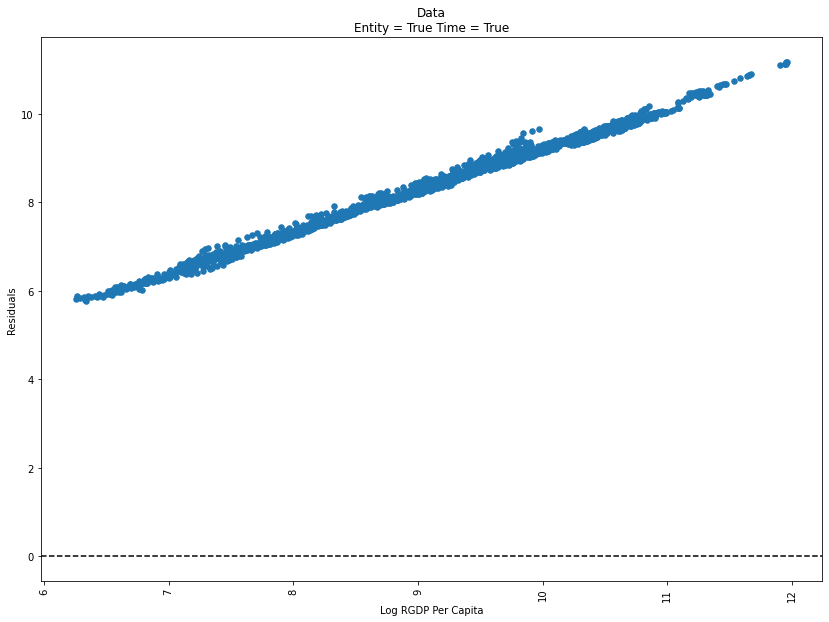

Data
Entity = True
Time = False
Data
                           PanelOLS Estimation Summary                           
Dep. Variable:     Log RGDP Per Capita   R-squared:                        0.2108
Estimator:                    PanelOLS   R-squared (Between):              0.2741
No. Observations:                 2031   R-squared (Within):               0.2108
Date:                 Sun, Nov 21 2021   R-squared (Overall):              0.2738
Time:                         18:18:19   Log-likelihood                    1397.6
Cov. Estimator:              Clustered                                           
                                         F-statistic:                      100.26
Entities:                          162   P-value                           0.0000
Avg Obs:                        12.537   Distribution:                  F(5,1877)
Min Obs:                        0.0000                                           
Max Obs:                        15.000   F-statistic (robust)

<ipython-input-28-1245126e54c2>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reg_data["Predictor"] = results.predict()
<ipython-input-28-1245126e54c2>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reg_data["Residuals"] = reg_data[y_name[0]].sub(reg_data["Predictor"])


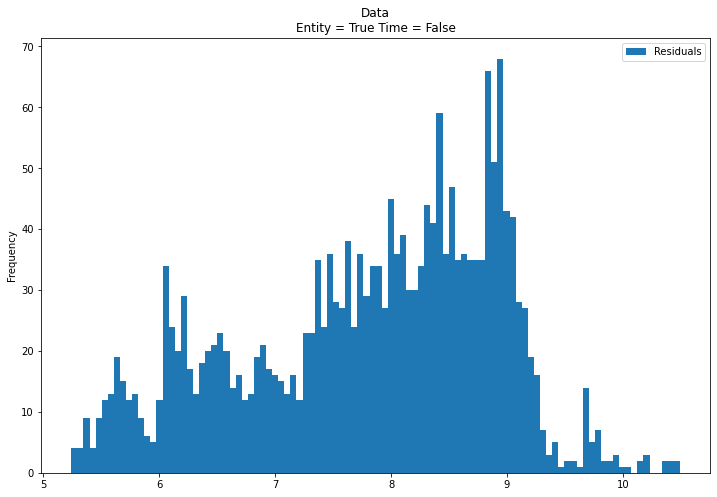

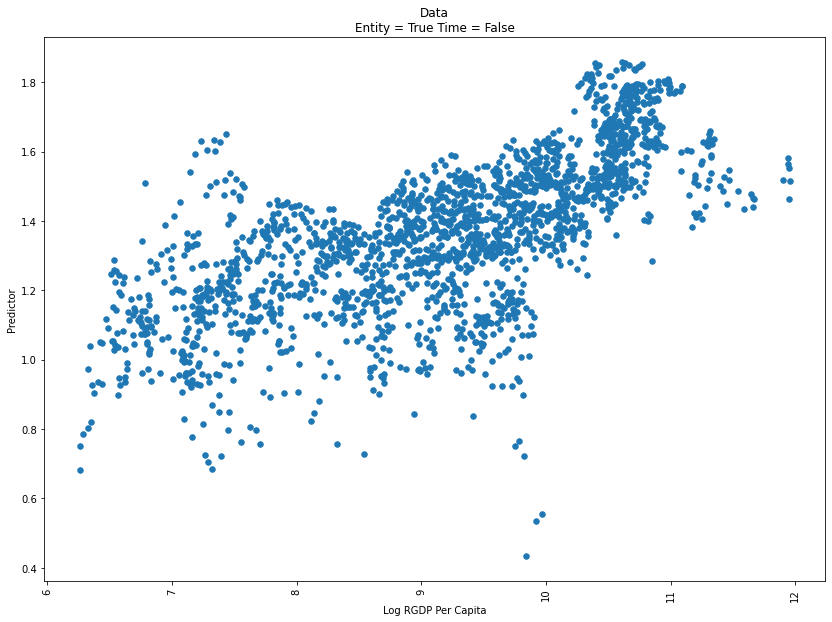

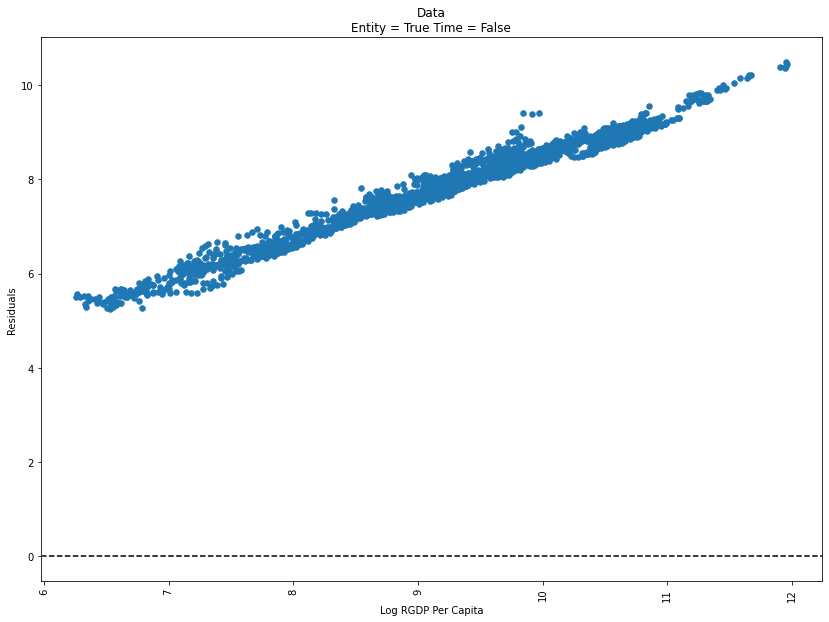

Data
Entity = False
Time = True
Data
                           PanelOLS Estimation Summary                           
Dep. Variable:     Log RGDP Per Capita   R-squared:                        0.6156
Estimator:                    PanelOLS   R-squared (Between):              0.5805
No. Observations:                 2031   R-squared (Within):              -1.5357
Date:                 Sun, Nov 21 2021   R-squared (Overall):              0.5823
Time:                         18:18:20   Log-likelihood                   -2335.4
Cov. Estimator:              Clustered                                           
                                         F-statistic:                      643.99
Entities:                          162   P-value                           0.0000
Avg Obs:                        12.537   Distribution:                  F(5,2011)
Min Obs:                        0.0000                                           
Max Obs:                        15.000   F-statistic (robust)

<ipython-input-28-1245126e54c2>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reg_data["Predictor"] = results.predict()
<ipython-input-28-1245126e54c2>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reg_data["Residuals"] = reg_data[y_name[0]].sub(reg_data["Predictor"])


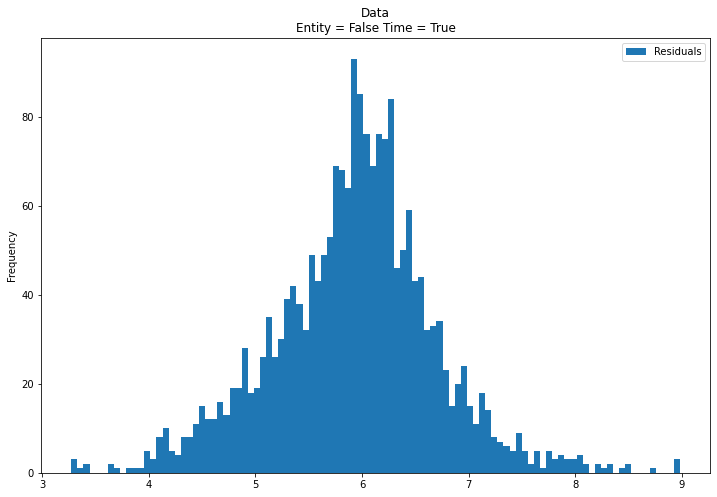

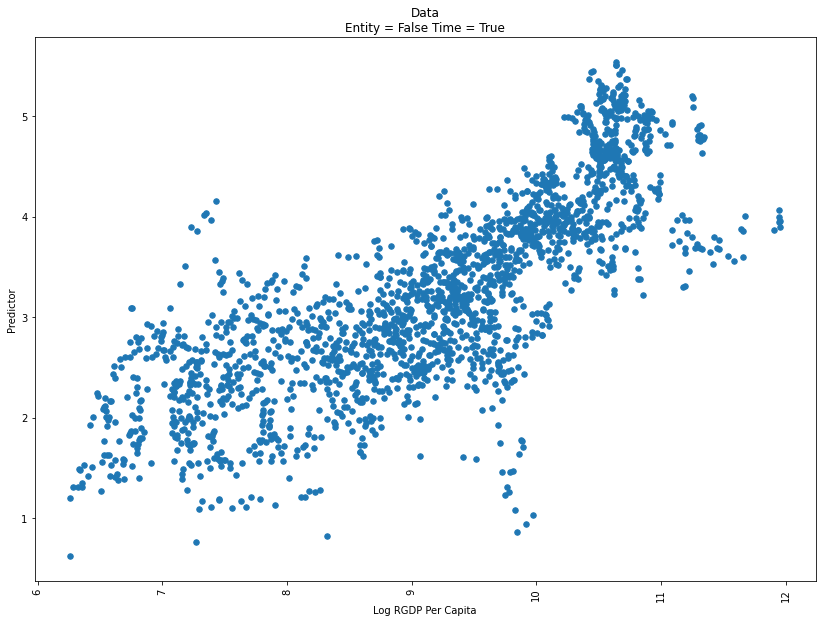

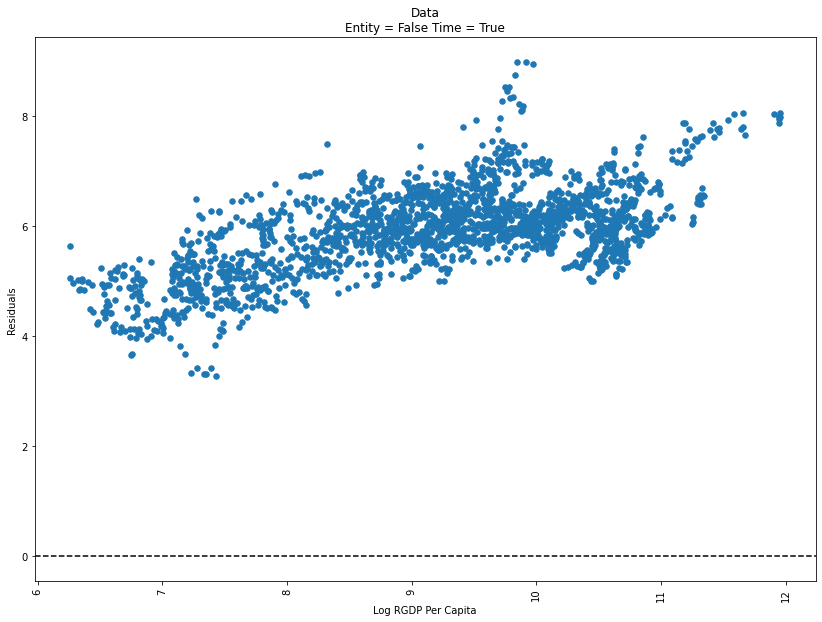

Data
Entity = False
Time = False
Data
                           PanelOLS Estimation Summary                           
Dep. Variable:     Log RGDP Per Capita   R-squared:                        0.9879
Estimator:                    PanelOLS   R-squared (Between):              0.9885
No. Observations:                 2031   R-squared (Within):              -4.3204
Date:                 Sun, Nov 21 2021   R-squared (Overall):              0.9879
Time:                         18:18:21   Log-likelihood                   -2915.1
Cov. Estimator:              Clustered                                           
                                         F-statistic:                   3.315e+04
Entities:                          162   P-value                           0.0000
Avg Obs:                        12.537   Distribution:                  F(5,2026)
Min Obs:                        0.0000                                           
Max Obs:                        15.000   F-statistic (robust

<ipython-input-28-1245126e54c2>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reg_data["Predictor"] = results.predict()
<ipython-input-28-1245126e54c2>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reg_data["Residuals"] = reg_data[y_name[0]].sub(reg_data["Predictor"])


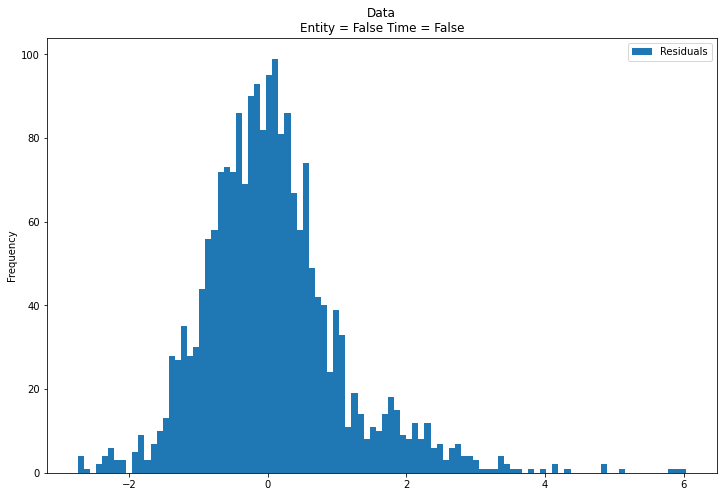

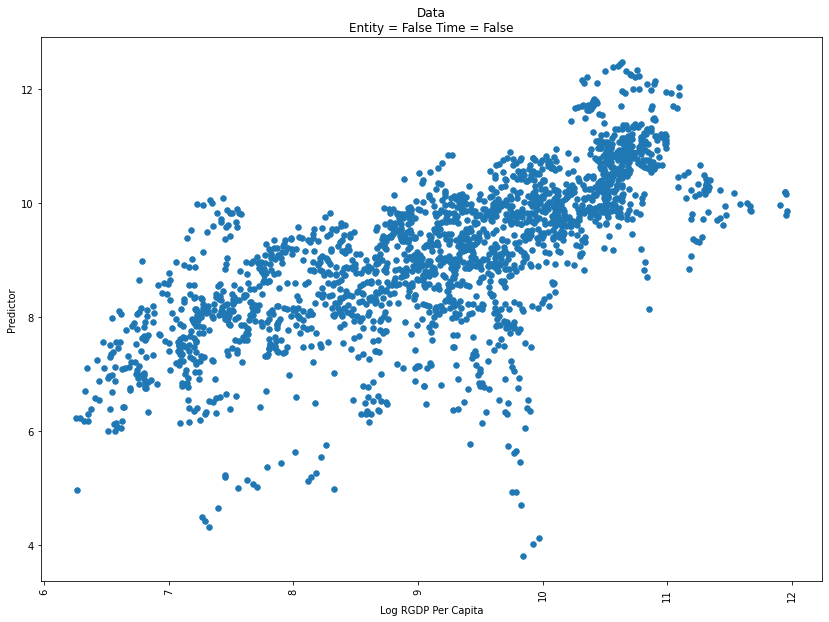

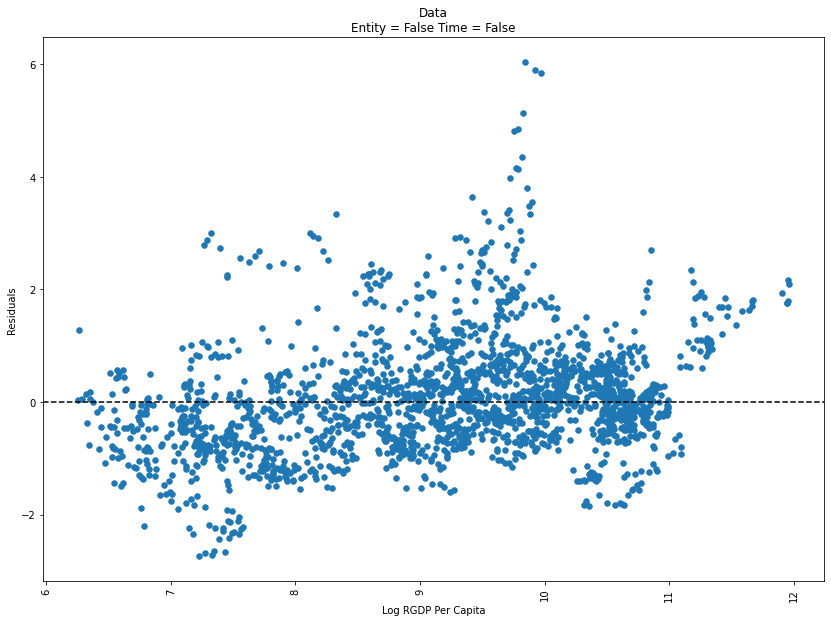

Diff Data
Entity = True
Time = True
Diff Data
                           PanelOLS Estimation Summary                           
Dep. Variable:     Log RGDP Per Capita   R-squared:                        0.0192
Estimator:                    PanelOLS   R-squared (Between):              0.0220
No. Observations:                 1882   R-squared (Within):               0.0177
Date:                 Sun, Nov 21 2021   R-squared (Overall):              0.0265
Time:                         18:18:21   Log-likelihood                    3701.2
Cov. Estimator:              Clustered                                           
                                         F-statistic:                      6.7241
Entities:                          162   P-value                           0.0000
Avg Obs:                        11.617   Distribution:                  F(5,1715)
Min Obs:                        0.0000                                           
Max Obs:                        14.000   F-statistic

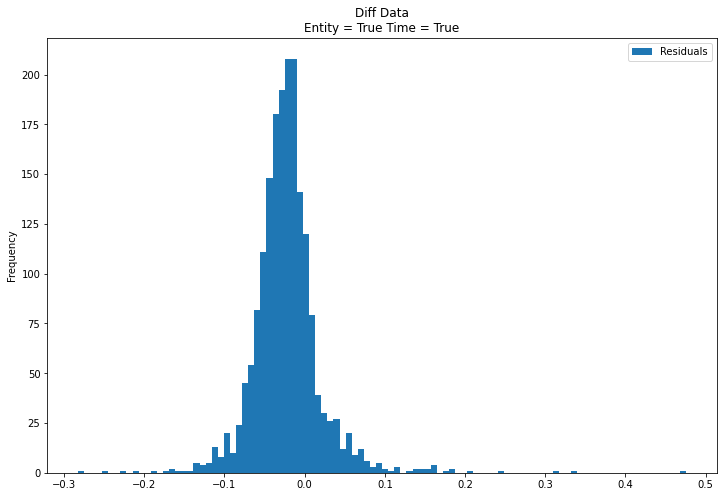

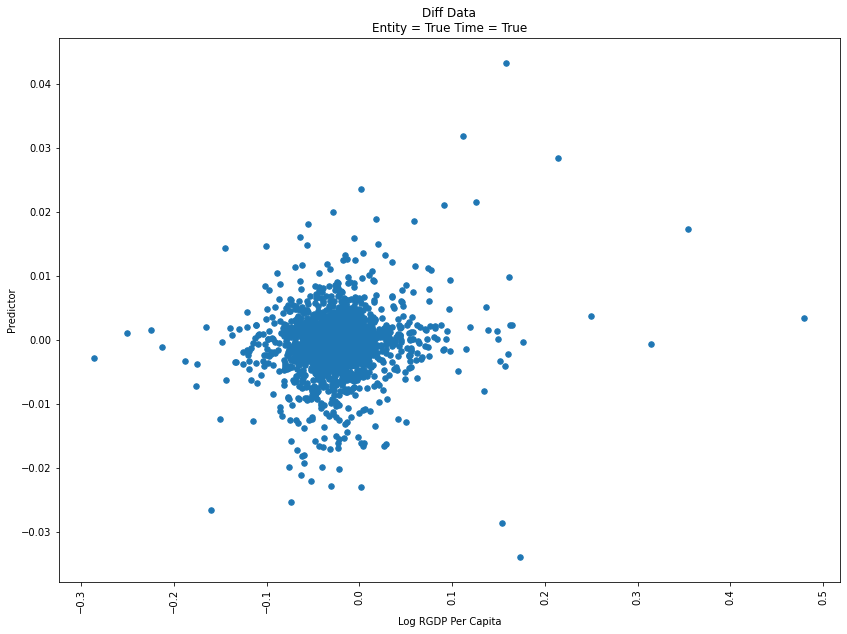

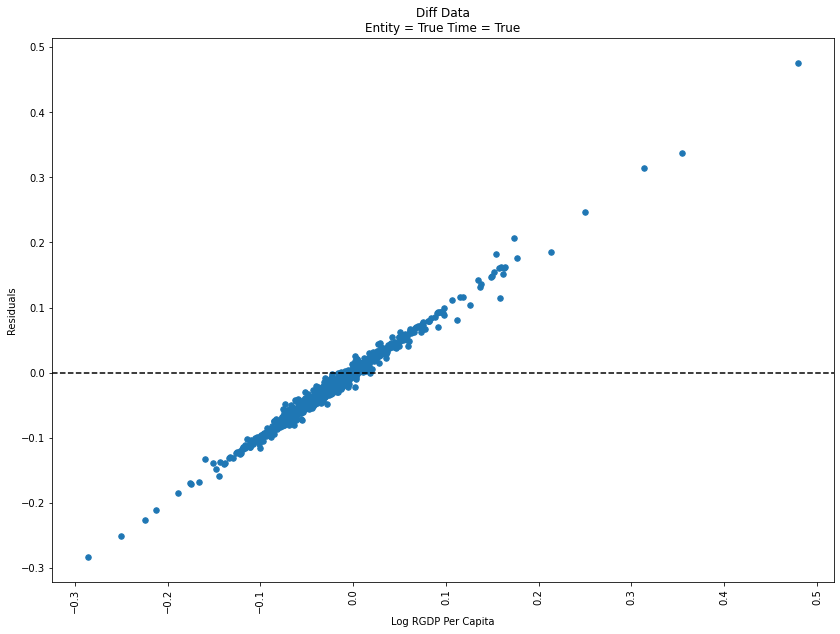

Diff Data
Entity = True
Time = False
Diff Data
                           PanelOLS Estimation Summary                           
Dep. Variable:     Log RGDP Per Capita   R-squared:                        0.0232
Estimator:                    PanelOLS   R-squared (Between):              0.0306
No. Observations:                 1882   R-squared (Within):               0.0232
Date:                 Sun, Nov 21 2021   R-squared (Overall):              0.0325
Time:                         18:18:22   Log-likelihood                    3531.4
Cov. Estimator:              Clustered                                           
                                         F-statistic:                      8.2208
Entities:                          162   P-value                           0.0000
Avg Obs:                        11.617   Distribution:                  F(5,1728)
Min Obs:                        0.0000                                           
Max Obs:                        14.000   F-statisti

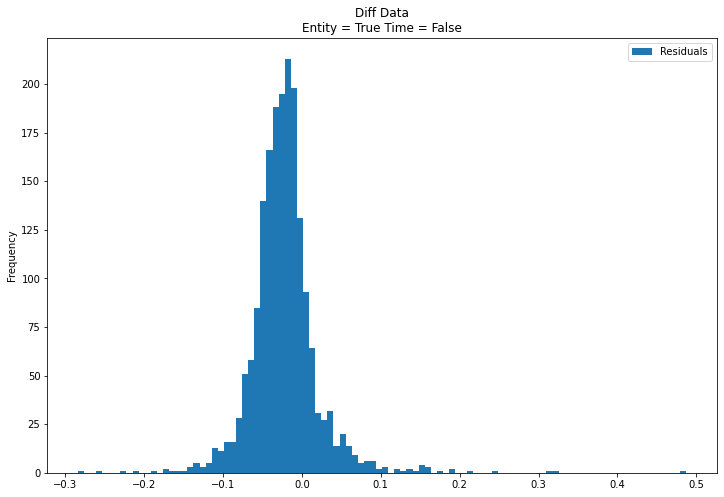

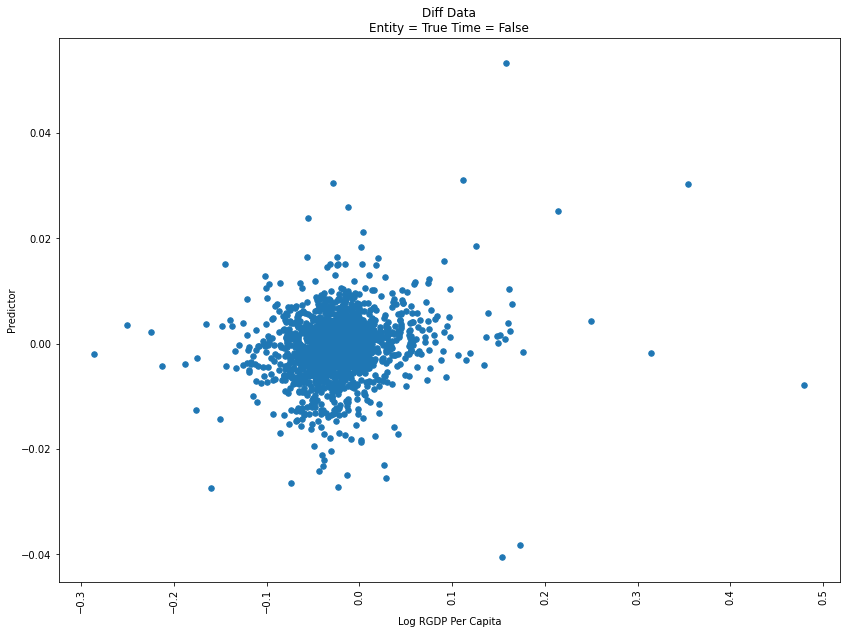

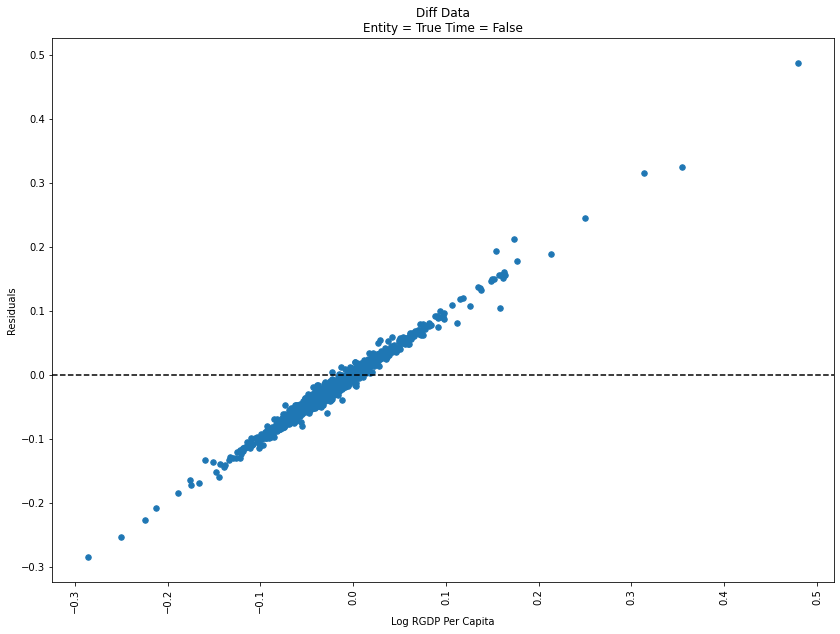

Diff Data
Entity = False
Time = True
Diff Data
                           PanelOLS Estimation Summary                           
Dep. Variable:     Log RGDP Per Capita   R-squared:                        0.0231
Estimator:                    PanelOLS   R-squared (Between):              0.0356
No. Observations:                 1882   R-squared (Within):               0.0184
Date:                 Sun, Nov 21 2021   R-squared (Overall):              0.0329
Time:                         18:18:23   Log-likelihood                    3339.5
Cov. Estimator:              Clustered                                           
                                         F-statistic:                      8.8245
Entities:                          162   P-value                           0.0000
Avg Obs:                        11.617   Distribution:                  F(5,1863)
Min Obs:                        0.0000                                           
Max Obs:                        14.000   F-statisti

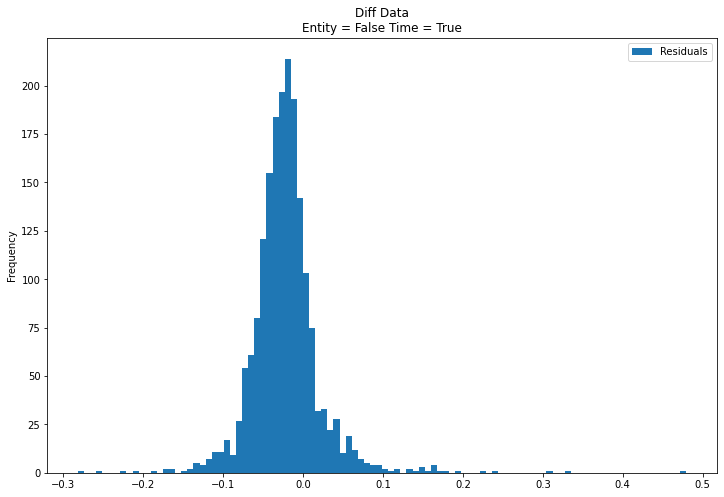

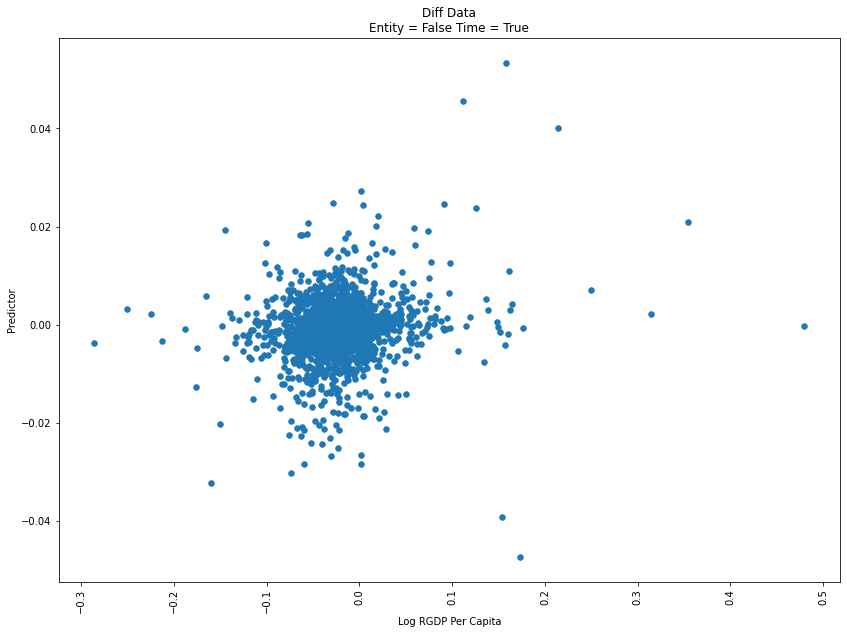

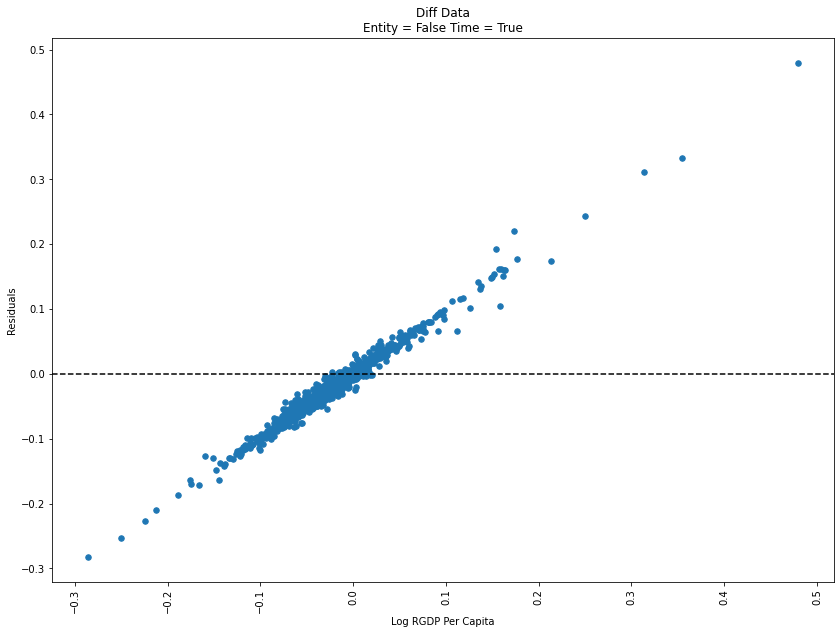

Diff Data
Entity = False
Time = False
Diff Data
                           PanelOLS Estimation Summary                           
Dep. Variable:     Log RGDP Per Capita   R-squared:                        0.0423
Estimator:                    PanelOLS   R-squared (Between):              0.0631
No. Observations:                 1882   R-squared (Within):               0.0076
Date:                 Sun, Nov 21 2021   R-squared (Overall):              0.0423
Time:                         18:18:23   Log-likelihood                    3013.0
Cov. Estimator:              Clustered                                           
                                         F-statistic:                      16.594
Entities:                          162   P-value                           0.0000
Avg Obs:                        11.617   Distribution:                  F(5,1877)
Min Obs:                        0.0000                                           
Max Obs:                        14.000   F-statist

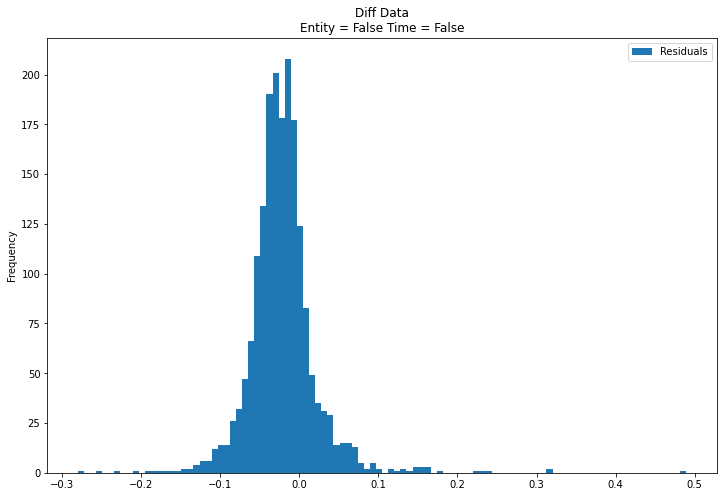

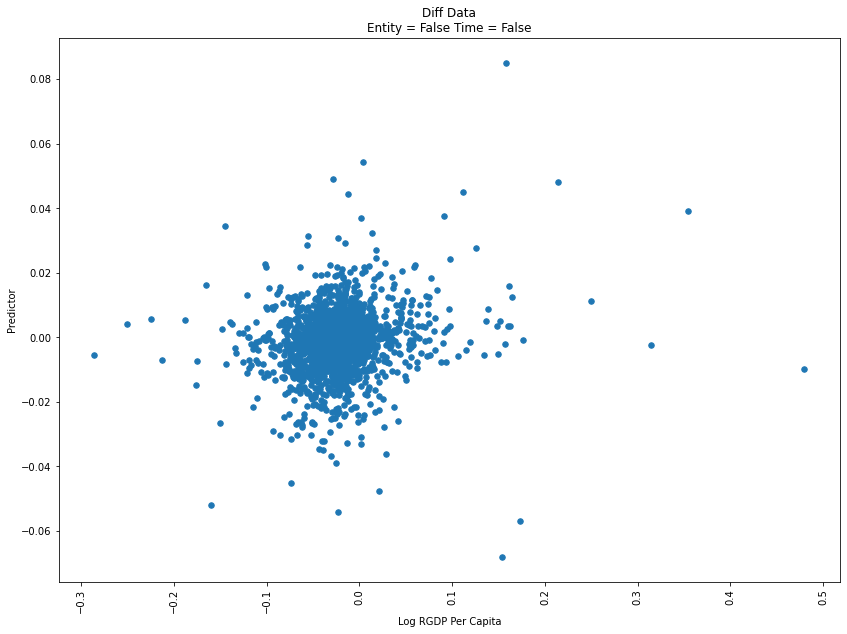

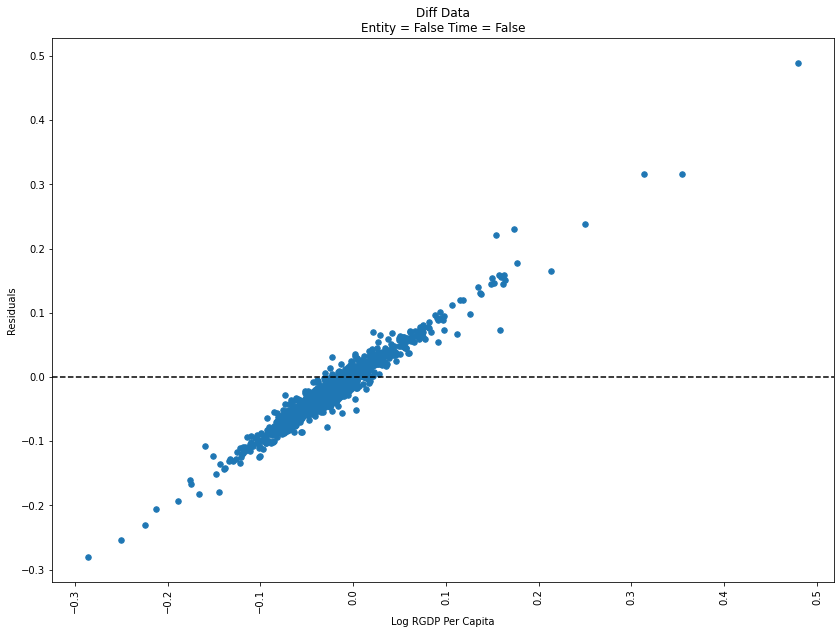

In [28]:
import matplotlib.pyplot as plt
from linearmodels import PanelOLS
# . . . .
y_name = ["Log RGDP Per Capita"]
X_names = [#"Log RGDP Per Capita Lag",
          "Size of Government", 
          "Legal System & Property Rights", 
          "Sound Money",
          "Freedom to trade internationally",
          "Regulation"]
for key, data in data_dict.items():
    for entity in [True, False]:
        for time in [True, False]:
            print(key)
            print("Entity =", entity)
            print("Time =", time)
            reg_data = data_dict[key].dropna()
            Y = reg_data[y_name]
            X = reg_data[X_names]
            #X["Constant"] = 1
            # call panel_regression method        
            model = PanelOLS(Y,X, entity_effects=entity, time_effects=time)
            results = model.fit(cov_type='clustered', cluster_entity=True)
            print(key, results, sep ="\n") 
            reg_data["Predictor"] = results.predict()
            reg_data["Residuals"] = reg_data[y_name[0]].sub(reg_data["Predictor"])

            # plot distribution of residuals
            fig, ax = plt.subplots(figsize = (12,8))
            reg_data[["Residuals"]].plot.hist(bins = 100, ax = ax)
            plt.title(key + "\nEntity = " + str(entity) + " Time = " + str(time) )

            # plot observed vs. predicted values
            fig, ax = plt.subplots(figsize = (14,10))
            reg_data.plot.scatter(x = y_name[0],
                             y = "Predictor", 
                              s = 30, ax = ax)
            plt.xticks(rotation=90)
            plt.title(key + "\nEntity = " + str(entity) + " Time = " + str(time) )
            plt.show()
            plt.close()

            # plot observed against residuals
            fig, ax = plt.subplots(figsize = (14,10))
            reg_data.plot.scatter(x = y_name[0],
                             y = "Residuals", 
                              s = 30, ax = ax)
            ax.axhline(0, ls = "--", color = "k")
            plt.xticks(rotation=90)
            plt.title(key + "\nEntity = " + str(entity) + " Time = " + str(time) )
            plt.show()
            plt.close()

## Adding the lag of Log RGDP improved the model for the non-differenced data for all the effects. 

Data
Entity = True
Time = True
Data
                           PanelOLS Estimation Summary                           
Dep. Variable:     Log RGDP Per Capita   R-squared:                        0.8784
Estimator:                    PanelOLS   R-squared (Between):              0.9982
No. Observations:                 2031   R-squared (Within):               0.9228
Date:                 Sun, Nov 21 2021   R-squared (Overall):              0.9974
Time:                         18:17:38   Log-likelihood                    3973.5
Cov. Estimator:              Clustered                                           
                                         F-statistic:                      2242.0
Entities:                          162   P-value                           0.0000
Avg Obs:                        12.537   Distribution:                  F(6,1862)
Min Obs:                        0.0000                                           
Max Obs:                        15.000   F-statistic (robust):

<ipython-input-26-94333ad66997>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["Constant"] = 1
<ipython-input-26-94333ad66997>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reg_data["Predictor"] = results.predict()
<ipython-input-26-94333ad66997>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.

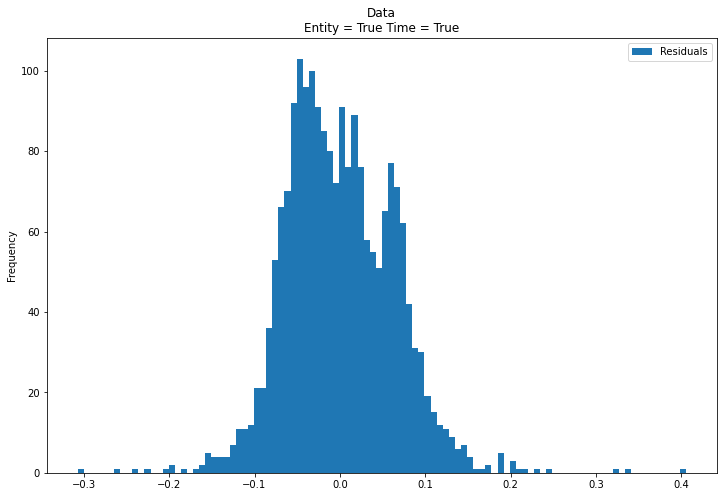

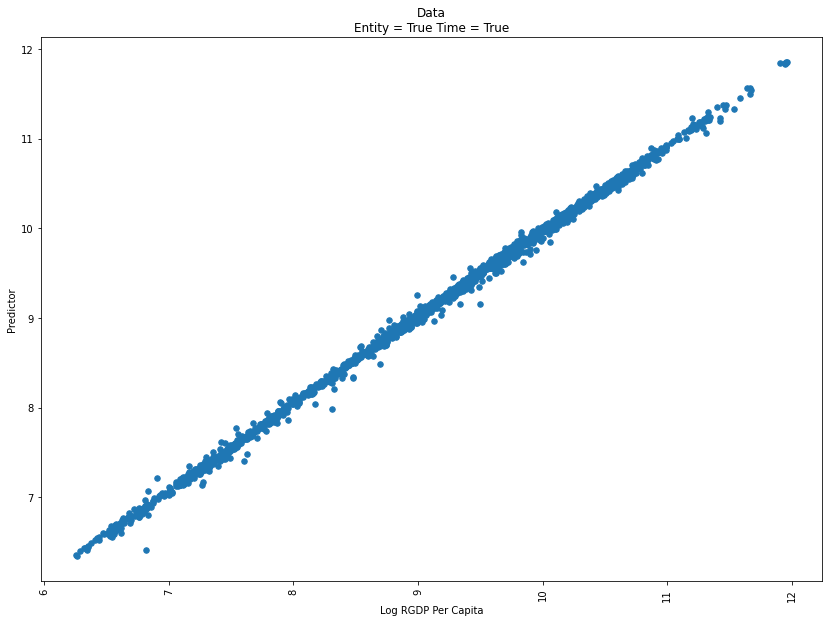

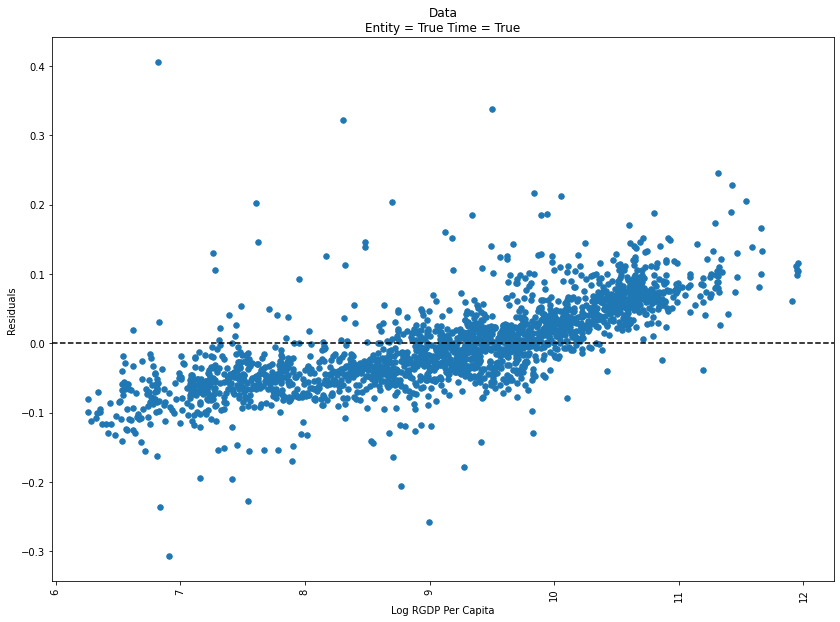

Data
Entity = True
Time = False
Data
                           PanelOLS Estimation Summary                           
Dep. Variable:     Log RGDP Per Capita   R-squared:                        0.9247
Estimator:                    PanelOLS   R-squared (Between):              0.9994
No. Observations:                 2031   R-squared (Within):               0.9247
Date:                 Sun, Nov 21 2021   R-squared (Overall):              0.9987
Time:                         18:17:39   Log-likelihood                    3783.6
Cov. Estimator:              Clustered                                           
                                         F-statistic:                      3839.7
Entities:                          162   P-value                           0.0000
Avg Obs:                        12.537   Distribution:                  F(6,1876)
Min Obs:                        0.0000                                           
Max Obs:                        15.000   F-statistic (robust)

<ipython-input-26-94333ad66997>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["Constant"] = 1
<ipython-input-26-94333ad66997>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reg_data["Predictor"] = results.predict()
<ipython-input-26-94333ad66997>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.

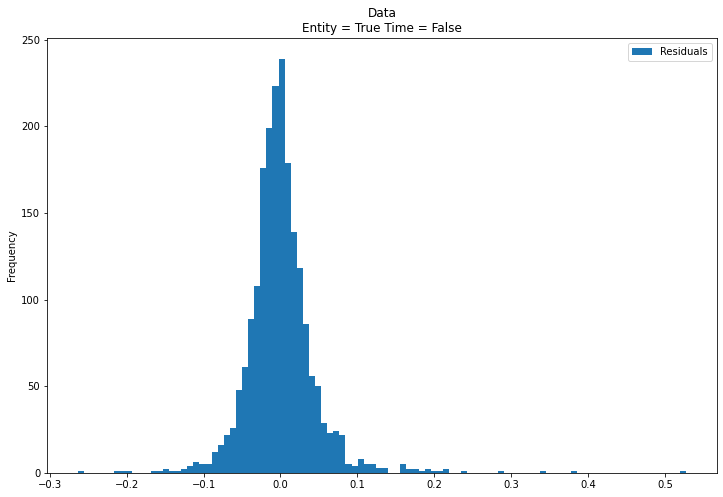

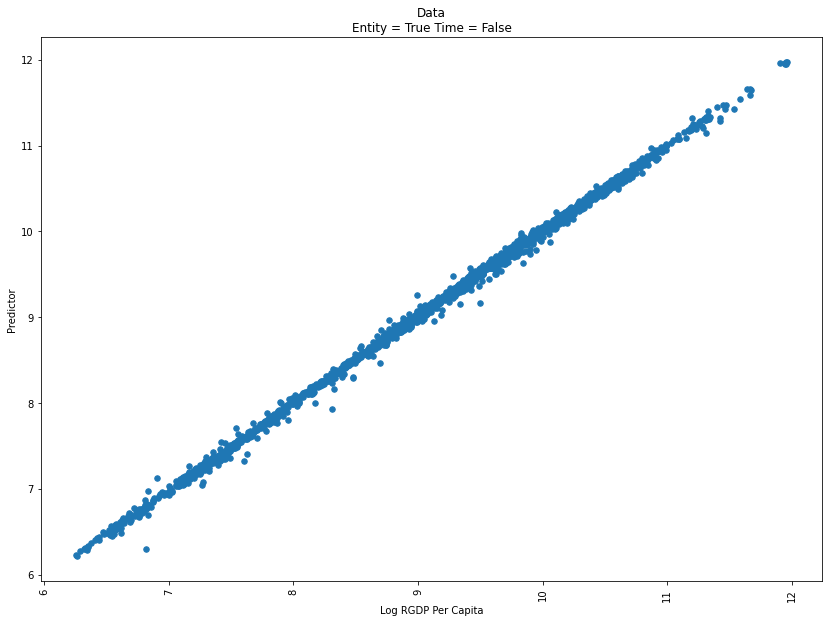

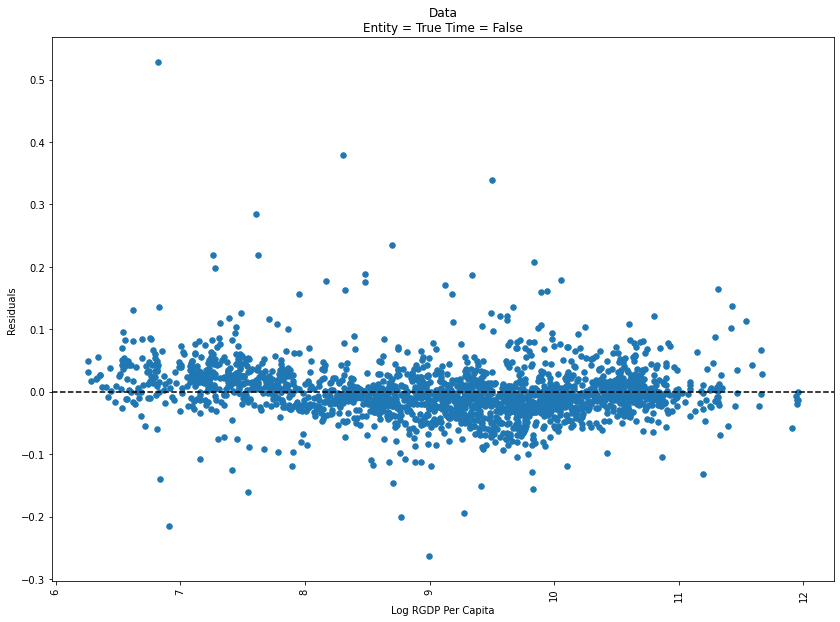

Data
Entity = False
Time = True
Data
                           PanelOLS Estimation Summary                           
Dep. Variable:     Log RGDP Per Capita   R-squared:                        0.9989
Estimator:                    PanelOLS   R-squared (Between):              0.9995
No. Observations:                 2031   R-squared (Within):               0.9241
Date:                 Sun, Nov 21 2021   R-squared (Overall):              0.9988
Time:                         18:17:40   Log-likelihood                    3617.6
Cov. Estimator:              Clustered                                           
                                         F-statistic:                   3.059e+05
Entities:                          162   P-value                           0.0000
Avg Obs:                        12.537   Distribution:                  F(6,2010)
Min Obs:                        0.0000                                           
Max Obs:                        15.000   F-statistic (robust)

<ipython-input-26-94333ad66997>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["Constant"] = 1
<ipython-input-26-94333ad66997>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reg_data["Predictor"] = results.predict()
<ipython-input-26-94333ad66997>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.

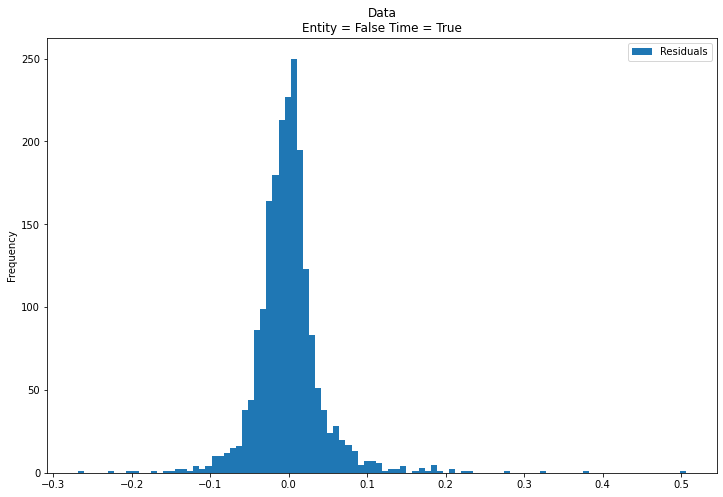

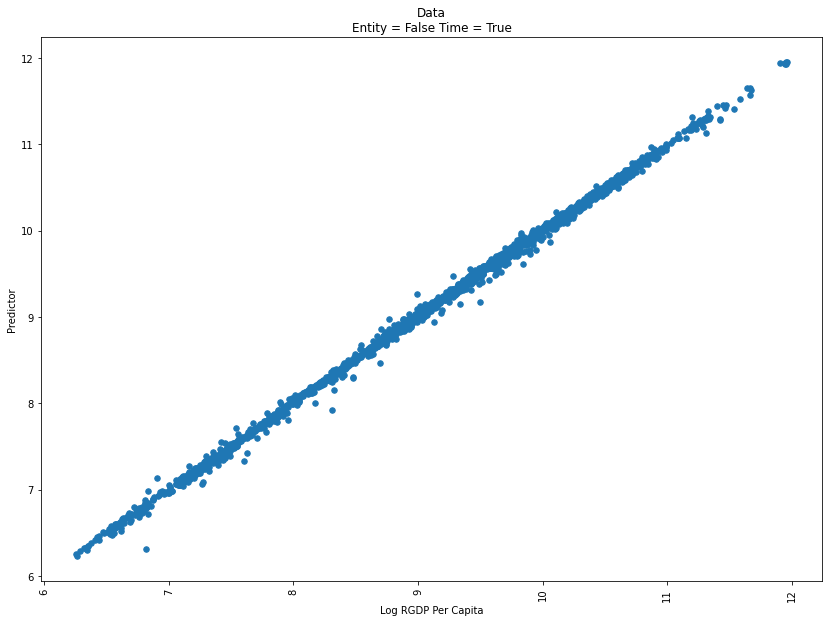

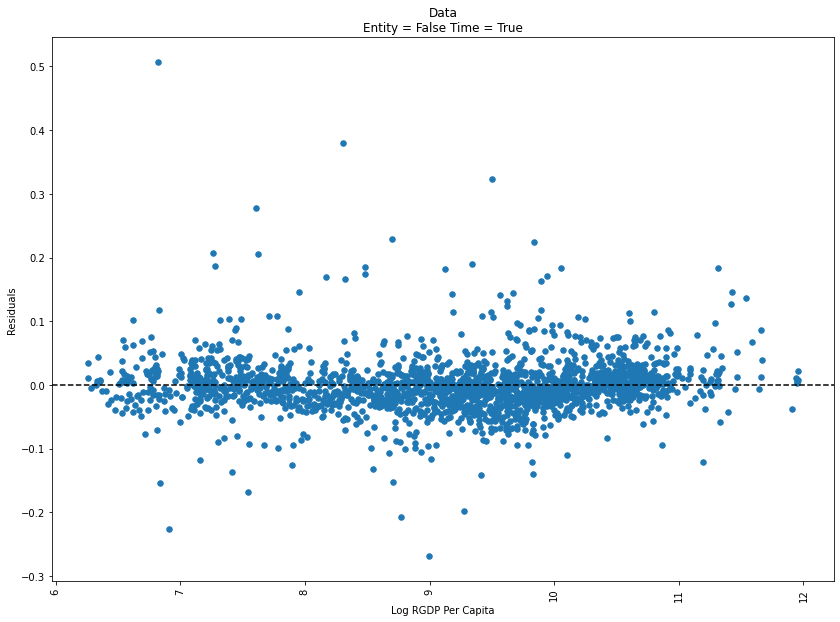

Data
Entity = False
Time = False
Data
                           PanelOLS Estimation Summary                           
Dep. Variable:     Log RGDP Per Capita   R-squared:                        0.9988
Estimator:                    PanelOLS   R-squared (Between):              0.9995
No. Observations:                 2031   R-squared (Within):               0.9241
Date:                 Sun, Nov 21 2021   R-squared (Overall):              0.9988
Time:                         18:17:40   Log-likelihood                    3486.4
Cov. Estimator:              Clustered                                           
                                         F-statistic:                   2.714e+05
Entities:                          162   P-value                           0.0000
Avg Obs:                        12.537   Distribution:                  F(6,2024)
Min Obs:                        0.0000                                           
Max Obs:                        15.000   F-statistic (robust

<ipython-input-26-94333ad66997>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["Constant"] = 1
<ipython-input-26-94333ad66997>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reg_data["Predictor"] = results.predict()
<ipython-input-26-94333ad66997>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.

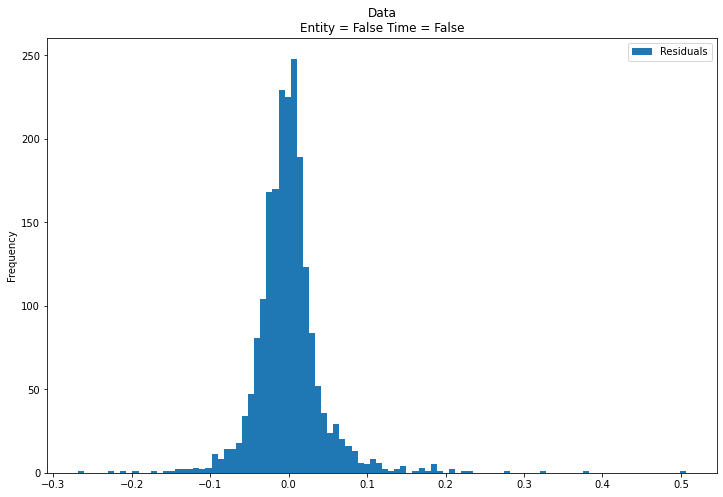

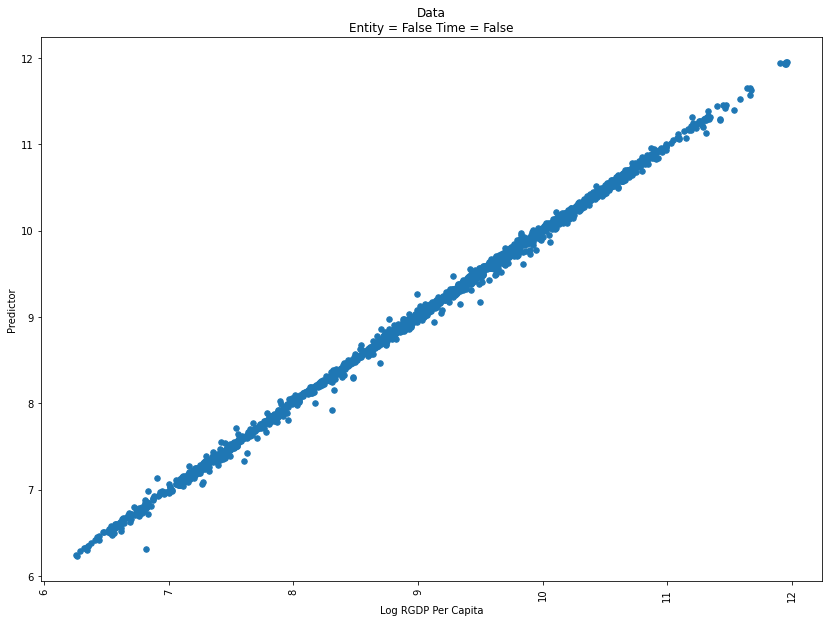

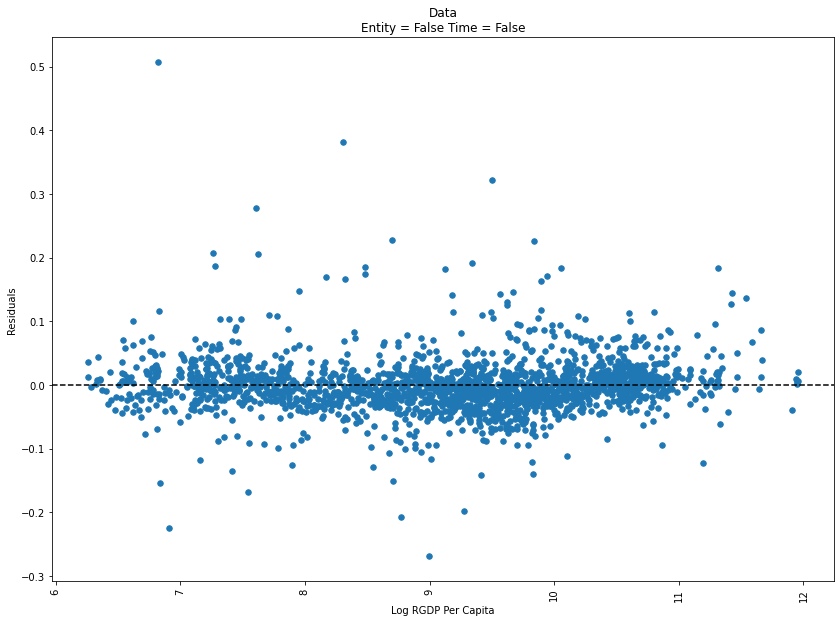

Diff Data
Entity = True
Time = True
Diff Data
                           PanelOLS Estimation Summary                           
Dep. Variable:     Log RGDP Per Capita   R-squared:                        0.0818
Estimator:                    PanelOLS   R-squared (Between):              0.3265
No. Observations:                 1882   R-squared (Within):               0.0754
Date:                 Sun, Nov 21 2021   R-squared (Overall):              0.1668
Time:                         18:17:41   Log-likelihood                    3763.3
Cov. Estimator:              Clustered                                           
                                         F-statistic:                      25.464
Entities:                          162   P-value                           0.0000
Avg Obs:                        11.617   Distribution:                  F(6,1714)
Min Obs:                        0.0000                                           
Max Obs:                        14.000   F-statistic

<ipython-input-26-94333ad66997>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["Constant"] = 1


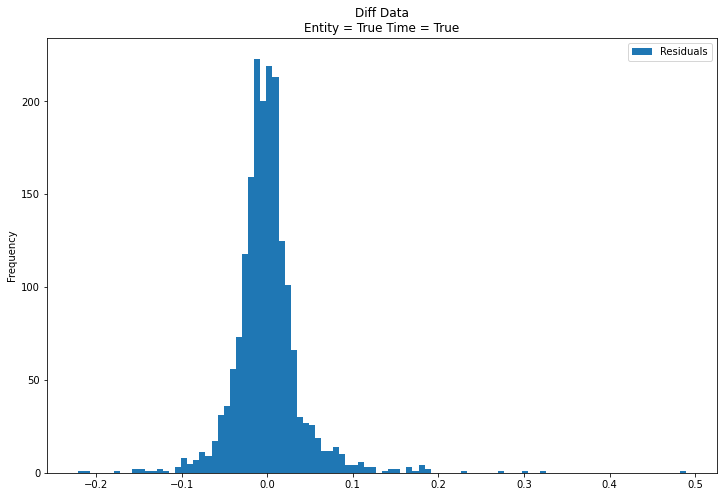

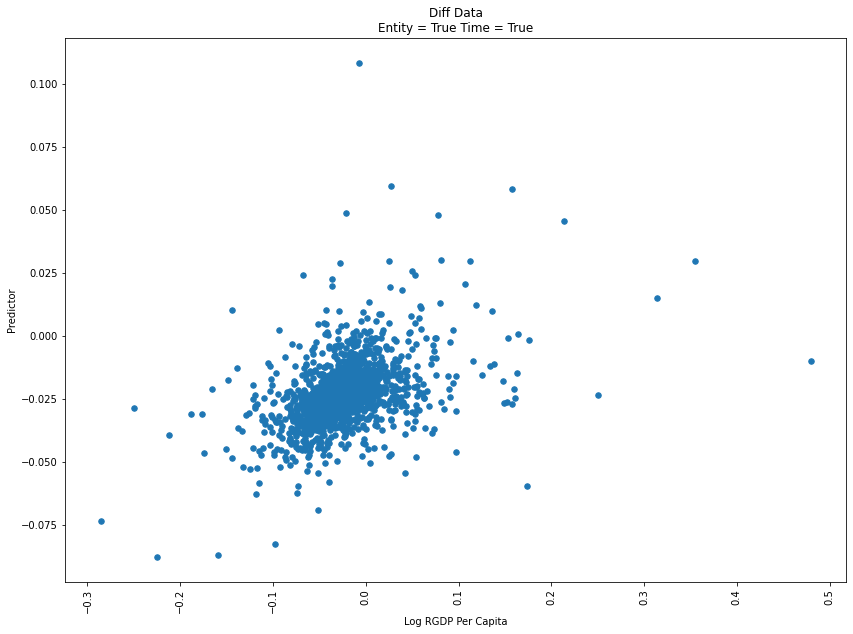

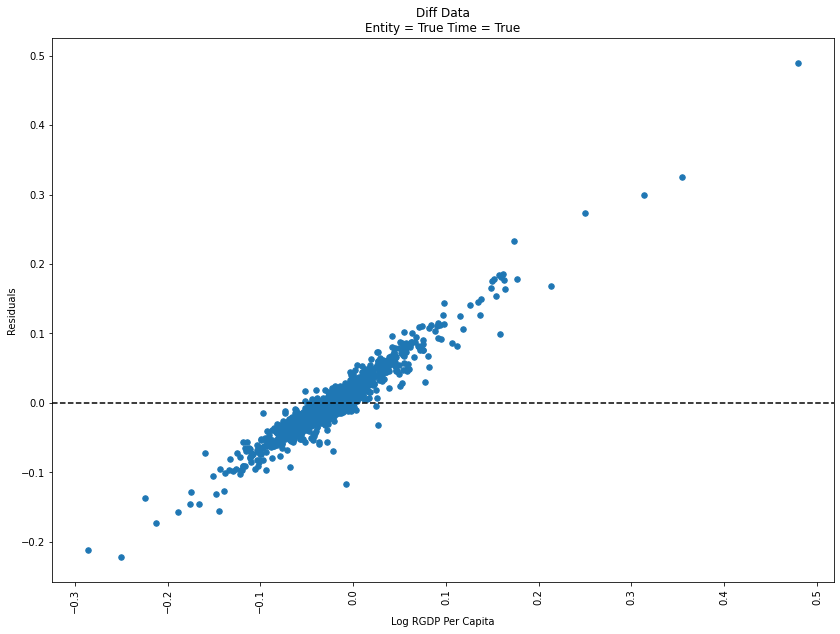

Diff Data
Entity = True
Time = False
Diff Data
                           PanelOLS Estimation Summary                           
Dep. Variable:     Log RGDP Per Capita   R-squared:                        0.0799
Estimator:                    PanelOLS   R-squared (Between):              0.3206
No. Observations:                 1882   R-squared (Within):               0.0799
Date:                 Sun, Nov 21 2021   R-squared (Overall):              0.1665
Time:                         18:17:42   Log-likelihood                    3587.6
Cov. Estimator:              Clustered                                           
                                         F-statistic:                      24.985
Entities:                          162   P-value                           0.0000
Avg Obs:                        11.617   Distribution:                  F(6,1727)
Min Obs:                        0.0000                                           
Max Obs:                        14.000   F-statisti

<ipython-input-26-94333ad66997>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["Constant"] = 1


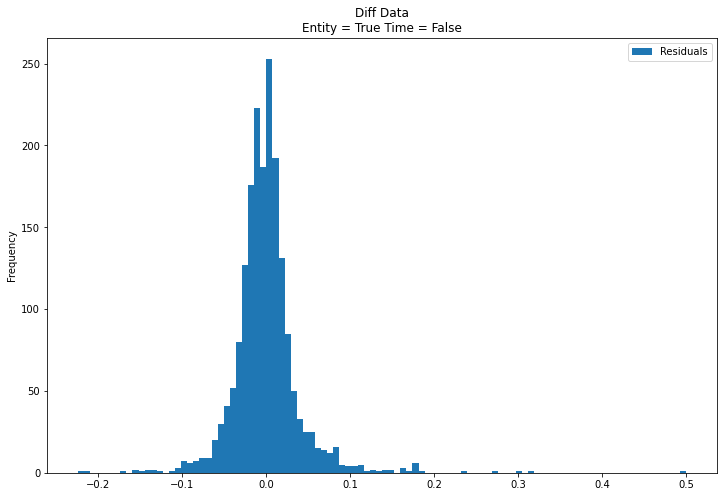

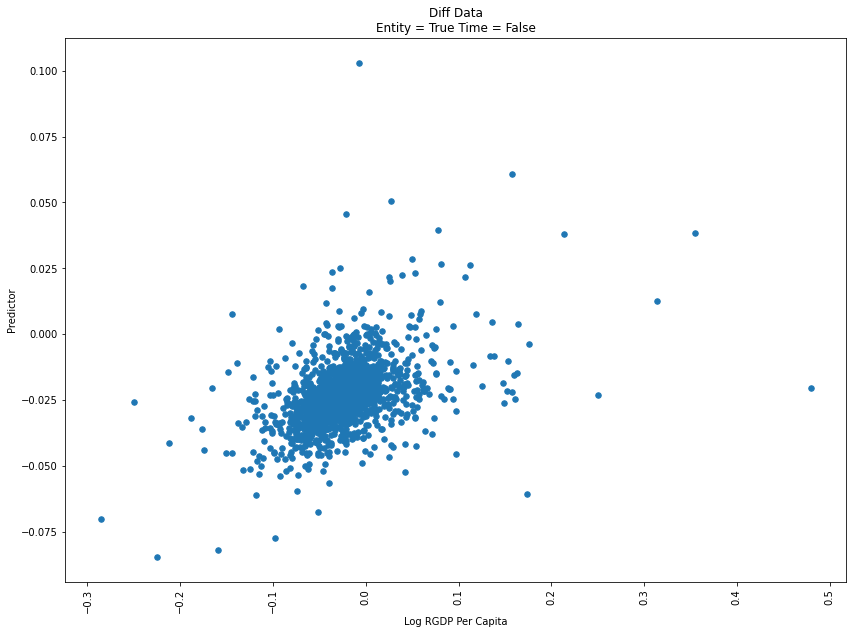

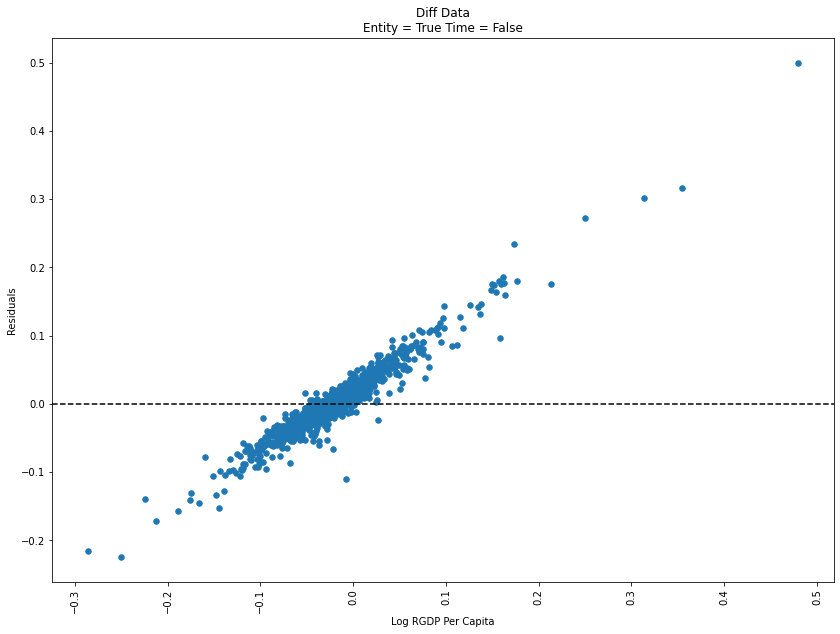

Diff Data
Entity = False
Time = True
Diff Data
                           PanelOLS Estimation Summary                           
Dep. Variable:     Log RGDP Per Capita   R-squared:                        0.2314
Estimator:                    PanelOLS   R-squared (Between):              0.5560
No. Observations:                 1882   R-squared (Within):               0.0215
Date:                 Sun, Nov 21 2021   R-squared (Overall):              0.1998
Time:                         18:17:43   Log-likelihood                    3565.2
Cov. Estimator:              Clustered                                           
                                         F-statistic:                      93.446
Entities:                          162   P-value                           0.0000
Avg Obs:                        11.617   Distribution:                  F(6,1862)
Min Obs:                        0.0000                                           
Max Obs:                        14.000   F-statisti

<ipython-input-26-94333ad66997>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["Constant"] = 1


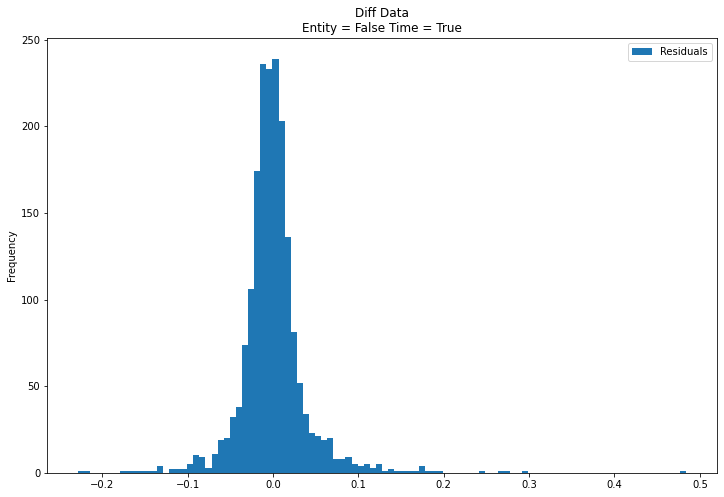

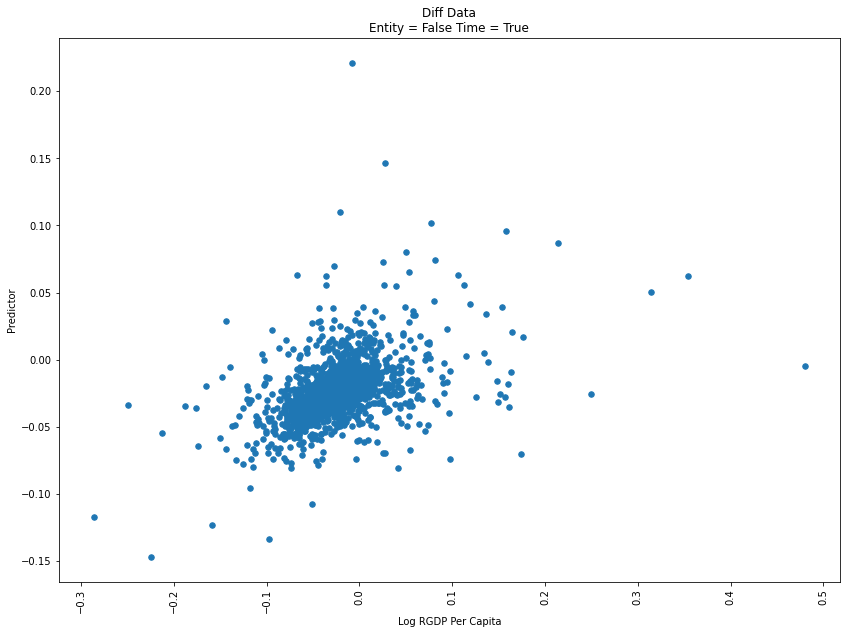

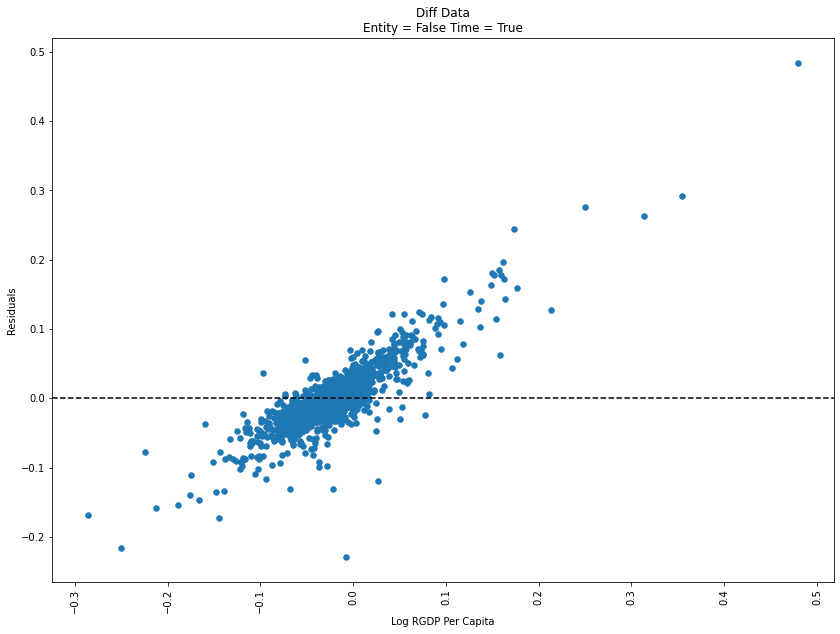

Diff Data
Entity = False
Time = False
Diff Data
                           PanelOLS Estimation Summary                           
Dep. Variable:     Log RGDP Per Capita   R-squared:                        0.2037
Estimator:                    PanelOLS   R-squared (Between):              0.5294
No. Observations:                 1882   R-squared (Within):               0.0404
Date:                 Sun, Nov 21 2021   R-squared (Overall):              0.2037
Time:                         18:17:43   Log-likelihood                    3409.4
Cov. Estimator:              Clustered                                           
                                         F-statistic:                      79.930
Entities:                          162   P-value                           0.0000
Avg Obs:                        11.617   Distribution:                  F(6,1875)
Min Obs:                        0.0000                                           
Max Obs:                        14.000   F-statist

<ipython-input-26-94333ad66997>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["Constant"] = 1


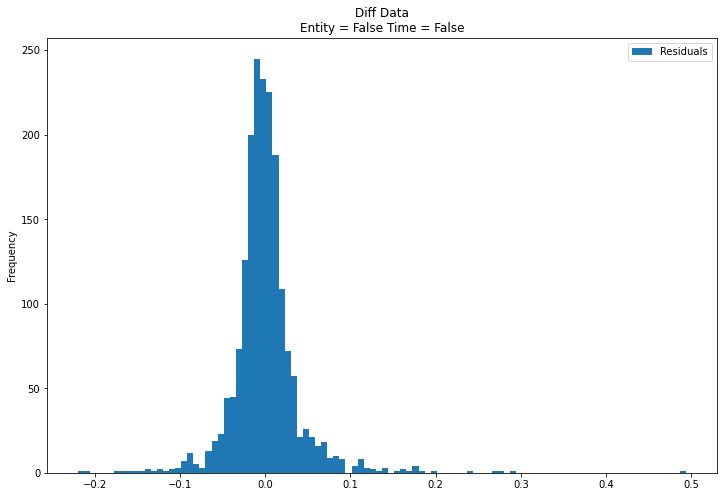

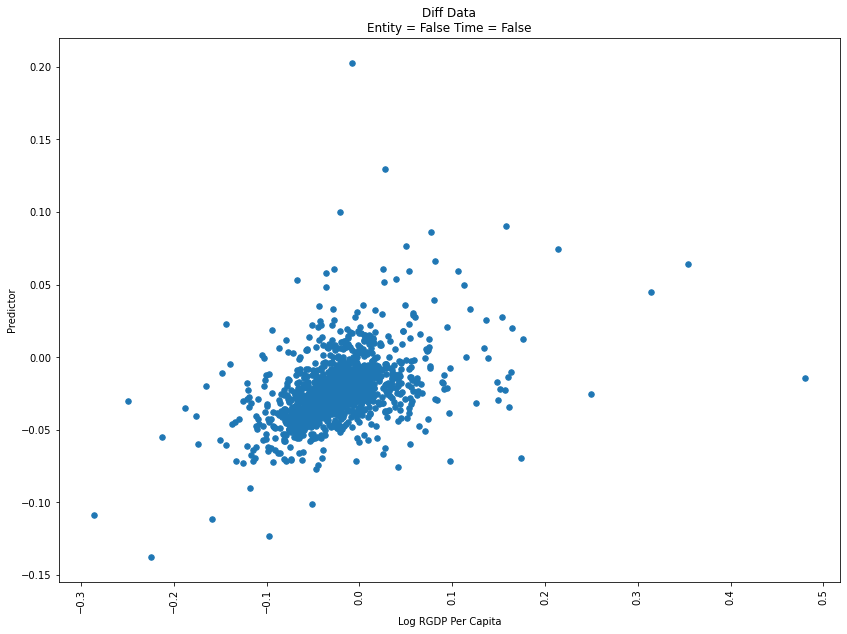

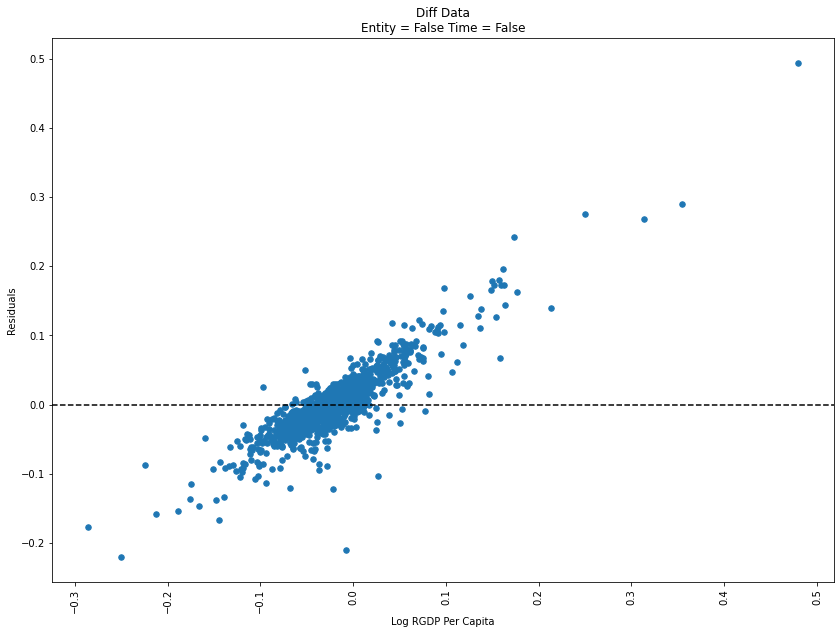

In [26]:
import matplotlib.pyplot as plt
from linearmodels import PanelOLS
# . . . .
y_name = ["Log RGDP Per Capita"]
X_names = ["Log RGDP Per Capita Lag",
          "Size of Government", 
          "Legal System & Property Rights", 
          "Sound Money",
          "Freedom to trade internationally",
          "Regulation"]
for key, data in data_dict.items():
    for entity in [True, False]:
        for time in [True, False]:
            print(key)
            print("Entity =", entity)
            print("Time =", time)
            reg_data = data_dict[key].dropna()
            Y = reg_data[y_name]
            X = reg_data[X_names]
            X["Constant"] = 1
            # call panel_regression method        
            model = PanelOLS(Y,X, entity_effects=entity, time_effects=time)
            results = model.fit(cov_type='clustered', cluster_entity=True)
            print(key, results, sep ="\n") 
            reg_data["Predictor"] = results.predict()
            reg_data["Residuals"] = reg_data[y_name[0]].sub(reg_data["Predictor"])

            # plot distribution of residuals
            fig, ax = plt.subplots(figsize = (12,8))
            reg_data[["Residuals"]].plot.hist(bins = 100, ax = ax)
            plt.title(key + "\nEntity = " + str(entity) + " Time = " + str(time) )

            # plot observed vs. predicted values
            fig, ax = plt.subplots(figsize = (14,10))
            reg_data.plot.scatter(x = y_name[0],
                             y = "Predictor", 
                              s = 30, ax = ax)
            plt.xticks(rotation=90)
            plt.title(key + "\nEntity = " + str(entity) + " Time = " + str(time) )
            plt.show()
            plt.close()

            # plot observed against residuals
            fig, ax = plt.subplots(figsize = (14,10))
            reg_data.plot.scatter(x = y_name[0],
                             y = "Residuals", 
                              s = 30, ax = ax)
            ax.axhline(0, ls = "--", color = "k")
            plt.xticks(rotation=90)
            plt.title(key + "\nEntity = " + str(entity) + " Time = " + str(time) )
            plt.show()
            plt.close()